In [3]:
import pandas as pd
import numpy as np
import os
import math
import scipy
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats



path="C:/Users/KatherineRidley/Mint Diagnostics Ltd/Mint Drive - Documents/Data/IVI_serumvsaliva_KR/"
# full original dataset = Results_1_2_collated_KR

# IMPORT RAW DATA CSV
# RETRIEVE SAMPLE AND PATIENT DATA FROM BARCODE

data=pd.read_csv(os.path.join(path, "Results_1_2_collated_KR.csv"))
#print(data[data['Shipment']==2])
#data=data.loc[(data['Shipment']==2) & (data['Type']=='Saliva')]
for index, row in data.iterrows():
    if (row['Type']=='Saliva') & (row['Shipment']==2):
        #print(data.at[index, 'Samples'])
        sample=re.match('(\w{3})\s', str(data.at[index, 'Samples']))
        
        #data['Sample']=sample.group()
        data.loc[(data['Shipment']==2) & (data['Type']=='Saliva'), 'Sample'] = data['Samples'].str.split(' ', expand=True)[0]
        data.loc[(data['Shipment']==2) & (data['Type']=='Saliva'), 'Patient ID'] = data['Samples'].str.split(' ', expand=True)[1]
        data.loc[(data['Shipment']==2) & (data['Type']=='Saliva'), 'Group'] = data['Patient ID'].str.extract('\d{2}(\w{1})', expand=True)[0]
        data.loc[(data['Shipment']==2) & (data['Type']=='Saliva'), 'Patient ID'] = data['Patient ID'].str.extract('(\d{2})\w', expand=True)[0] 
        #data.loc[(data['Shipment']==2) & (data['Type']=='Saliva'), 'Patient ID'] = data['Patient ID'].str.extract('0(\d{1})', expand=True)[0]
        data.loc[(data['Shipment']==2) & (data['Type']=='Saliva'), 'Date'] = data['Samples'].str.split(' ', expand=True)[2]

print(data.columns)

#save csv
data.to_csv(os.path.join(path,"Results_1_2_collated_KR_2.csv"))




Index(['Samples', 'Progesterone (pg/mL)', 'Estradiol (pg/mL)', 'Comments',
       'Shipment', 'Patient ID', 'Group', 'Subgroup', 'Date', 'Type', 'Sample',
       'Time'],
      dtype='object')


In [2]:
import pandas as pd
import numpy as np
import os
import math
import scipy
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

path="C:/Users/KatherineRidley/Mint Diagnostics Ltd/Mint Drive - Documents/Data/IVI_serumvsaliva_KR/"

### Correlation stats per participant to csv:

In [ ]:
ogdf=pd.read_csv(os.path.join(path,"Results_1_2_collated_KR_2.csv"))
#data.loc[data['Estradiol (pg/mL)'].str.contains(">")| data['Estradiol (pg/mL)'].str.contains("<")| (data['Estradiol (pg/mL)']=='NaN') , 'Estradiol (pg/mL)']=0
new_data={'Patient ID':[], 'Group':[], 'Subgroup':[],'E_SFvBCcorr':[], 'E_SCvBCcorr':[], 'E_SFvSCcorr':[], 'E_SFvSCcorr_log':[], 'E_SCvBCcorr_log':[], 'E_SFvBCcorr_log':[],'P_SFvBCcorr':[], 'P_SCvBCcorr':[], 'P_SFvSCcorr':[], 'P_SFvSCcorr_log':[], 'P_SCvBCcorr_log':[], 'P_SFvBCcorr_log':[]}
ogdf=ogdf.loc[ogdf['Group']=='A']
patientlist=list(ogdf['Patient ID'].unique())
#data.loc[data['Patient ID']==p, 'Subgroup'].unique()

for p in patientlist:
    
    #print(p)
    data=ogdf.loc[ogdf['Patient ID']==p]
    S1FE=data.loc[data['Sample'].str.contains('F'), 'Estradiol (pg/mL)'].astype(float)
    S1CE=data.loc[(data['Sample'].str.contains('C')) & (data['Type']=='Saliva'), 'Estradiol (pg/mL)'].astype(float)
    BS1CE=data.loc[(data['Sample'].str.contains('C')) & (data['Type']=='Blood'), 'Estradiol (pg/mL)'].astype(float)
    S1FP=data.loc[data['Sample'].str.contains('F'), 'Progesterone (pg/mL)'].astype(float)
    S1CP=data.loc[(data['Sample'].str.contains('C')) & (data['Type']=='Saliva'), 'Progesterone (pg/mL)'].astype(float)
    BS1CP=data.loc[(data['Sample'].str.contains('C')) & (data['Type']=='Blood'), 'Progesterone (pg/mL)'].astype(float)

    S1FE.dropna(inplace=True)
    S1CE.dropna(inplace=True)
    BS1CE.dropna(inplace=True)
    S1CElog=np.log2((S1CE)+2)
    S1FElog=np.log2((S1FE)+2)
    BS1CElog=np.log2((BS1CE)+2)
    S1FP.dropna(inplace=True)
    S1CP.dropna(inplace=True)
    BS1CP.dropna(inplace=True)
    S1CPlog=np.log2((S1CP)+2)
    S1FPlog=np.log2((S1FP)+2)
    BS1CPlog=np.log2((BS1CP)+2)

    if (len(BS1CE)!=len(S1CE)) | (len(BS1CE)!=len(S1FE)):
        print('patient', p, ': not the same number of samples')
    else:
        sub=data['Subgroup'].unique()
        sub= [x for x in sub if pd.isnull(x) == False]

        #print(np.corrcoef(S1FE, BS1CE))
        new_data['Patient ID'].append(p)
        new_data['Group'].append(data['Group'].unique()[0])
        new_data['Subgroup'].append(sub[0])
        #new_data['Shipment'].append(s)
        new_data['E_SFvBCcorr'].append(np.corrcoef(S1FE, BS1CE)[0,1])
        new_data['E_SCvBCcorr'].append(np.corrcoef(S1CE, BS1CE)[0,1])
        new_data['E_SFvSCcorr'].append(np.corrcoef(S1CE, S1FE)[0,1])
        new_data['E_SFvSCcorr_log'].append(np.corrcoef(S1CElog, S1FElog)[0,1])
        new_data['E_SCvBCcorr_log'].append(np.corrcoef(S1CElog, BS1CElog)[0,1])
        new_data['E_SFvBCcorr_log'].append(np.corrcoef(S1FElog, BS1CElog)[0,1])
        new_data['P_SFvBCcorr'].append(np.corrcoef(S1FP, BS1CP)[0,1])
        new_data['P_SCvBCcorr'].append(np.corrcoef(S1CP, BS1CP)[0,1])
        new_data['P_SFvSCcorr'].append(np.corrcoef(S1CP, S1FP)[0,1])
        new_data['P_SFvSCcorr_log'].append(np.corrcoef(S1CPlog, S1FPlog)[0,1])
        new_data['P_SCvBCcorr_log'].append(np.corrcoef(S1CPlog, BS1CPlog)[0,1])
        new_data['P_SFvBCcorr_log'].append(np.corrcoef(S1FPlog, BS1CPlog)[0,1])



#print(new_data)
new_data=pd.DataFrame(new_data)
    
#print(new_data)
new_data.to_csv(os.path.join(path,"Correlation_results_190522.csv"))

### Data cleaning, normalisation and formatting for downstream regression and correlation analysis:

In [3]:
data=pd.read_csv(os.path.join(path,"Results_1_2_collated_KR_2.csv"))

print(data.columns)
#print(data['Patient ID'].dtype)
samples = ['S1C', 'S2C', 'S3C']
patients = list(data.loc[(data['Shipment']==2) & (data['Group']=='A'), 'Patient ID'].unique())
patients.remove(11)
#patients = patients.astype(int)
#print(data.loc[data['Patient ID']==2.0])
for s in samples:
    for p in patients:
        #print(s, p)
        data.loc[(data['Shipment']==2) & (data['Type']=='Saliva') & (data['Patient ID']==p), 'Subgroup']=data.loc[(data['Shipment']==2) & (data['Type']=='Blood') & (data['Sample']==s) & (data['Patient ID']==p), 'Subgroup'].values[0]
        #print(data.loc[(data['Shipment']==2) & (data['Type']=='Blood') & (data['Sample']==s) & (data['Patient ID']==p), 'Time'])
        data.loc[(data['Shipment']==2) & (data['Type']=='Saliva') & (data['Patient ID']==p), 'Subgroup']=data.loc[(data['Shipment']==2) & (data['Type']=='Blood') & (data['Sample']==s) & (data['Patient ID']==p), 'Subgroup'].values[0]
        data.loc[(data['Shipment']==2) & (data['Sample']==s) & (data['Type']=='Saliva') & (data['Patient ID']==p), 'Time']=data.loc[(data['Shipment']==2) & (data['Type']=='Blood') & (data['Sample']==s) & (data['Patient ID']==p), 'Time'].values[0]

samples = ['STC']
patients = list(data.loc[(data['Shipment']==2) & (data['Group']=='B'), 'Patient ID'].unique())
print(patients)

patients.remove(13)
#patients = patients.astype(int)
#print(data.loc[data['Patient ID']==2.0])
for s in samples:
    for p in patients:
        #print(s, p)
        data.loc[(data['Shipment']==2) & (data['Type']=='Saliva') & (data['Patient ID']==p), 'Subgroup']='TRANSFER'
        #print(data['Patient ID'])
        #print(data.loc[(data['Shipment']==2) & (data['Type']=='Blood') & (data['Sample']==s) & (data['Patient ID']==p), 'Time'])
        #data.loc[(data['Shipment']==2) & (data['Type']=='Saliva') & (data['Patient ID']==p), 'Subgroup']=data.loc[(data['Shipment']==2) & (data['Type']=='Blood') & (data['Sample']==s) & (data['Patient ID']==p), 'Subgroup'].values[0]
        print(p, s)
        #print(data.loc[(data['Shipment']==2) & (data['Type']=='Blood') & (data['Sample']==s) & (data['Patient ID']==p)])
        data.loc[(data['Shipment']==2) & (data['Sample']==s) & (data['Type']=='Saliva') & (data['Patient ID']==p), 'Time']=data.loc[(data['Shipment']==2) & (data['Type']=='Blood') & (data['Sample']==s) & (data['Patient ID']==p), 'Time'].values[0]

data.to_csv(os.path.join(path,"Results_1_2_collated_KR_3_wgroupb.csv"))



Index(['Unnamed: 0', 'Samples', 'Progesterone (pg/mL)', 'Estradiol (pg/mL)',
       'Comments', 'Shipment', 'Patient ID', 'Group', 'Subgroup', 'Date',
       'Type', 'Sample', 'Time'],
      dtype='object')
[13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 38.0]
14.0 STC
15.0 STC
16.0 STC
17.0 STC
18.0 STC
19.0 STC
20.0 STC
21.0 STC
22.0 STC
23.0 STC
24.0 STC
25.0 STC
26.0 STC
27.0 STC
28.0 STC
29.0 STC
30.0 STC
31.0 STC
38.0 STC


In [46]:
data1=pd.read_csv(os.path.join(path,"Results_1_2_collated_KR_3_wgroupb.csv"))

data1=data1.loc[data1['Group']=='A']
#print('1',len(data1[(data1['Group']=='B') & (data1['Type']=='Blood')]))
#data.loc[data['Estradiol (pg/mL)'].str.contains(">")| data['Estradiol (pg/mL)'].str.contains("<")| (data['Estradiol (pg/mL)']=='NaN') , 'Estradiol (pg/mL)']=0
#data1.loc[data1['Progesterone (pg/mL)'].str.contains(">")| data1['Progesterone (pg/mL)'].str.contains("<")| (data1['Progesterone (pg/mL)']=='NaN') , 'Progesterone (pg/mL)']=0
#new_data={'Patient ID':[], 'Group':[], 'Subgroup':[],'E_SFvBCcorr':[], 'E_SCvBCcorr':[], 'E_SFvSCcorr':[], 'E_SFvSCcorr_log':[], 'E_SCvBCcorr_log':[], 'E_SFvBCcorr_log':[],'P_SFvBCcorr':[], 'P_SCvBCcorr':[], 'P_SFvSCcorr':[], 'P_SFvSCcorr_log':[], 'P_SCvBCcorr_log':[], 'P_SFvBCcorr_log':[]}
#print('data patient len', len(data1['Patient ID'].unique()))
new_data={'Patient ID':[], 'Group':[], 'Subgroup':[], 'Sample':[], 'Type':[],'Time':[], 'Estradiol (pg/mL)':[], 'Progesterone (pg/mL)':[],
 'Estradiol (pg/mL)_norm':[], 'Progesterone (pg/mL)_norm':[], 'Estradiol (pg/mL)_quartiles':[], 'Progesterone (pg/mL)_quartiles':[] }
samples = [(data1['Sample'].str.contains('F')), (data1['Sample'].str.contains('C'))]
types = list(data1['Type'].unique())
#print(types)
data1['Progesterone (pg/mL)']=data1['Progesterone (pg/mL)'].astype(float)
data1.loc[(data1['Type']=='Blood'), 'Progesterone (pg/mL)'] = data1.loc[(data1['Type']=='Blood'), 'Progesterone (pg/mL)']*1000
#print('2',len(data1[(data1['Group']=='B') & (data1['Type']=='Blood')]))
groups = list(data1['Group'].unique())
#only keep rows in dataframe with all z-scores less than absolute value of 3 
##### outlier omission needs to be corrected ########
#print(data.shape)

for s in samples:
    for t in types:
       
        #print(data1.loc[s])

        data=data1.loc[s & (data1['Type']==t)]
        #print('3',len(data[(data['Group']=='B') & (data['Type']=='Blood')]), data['Sample'].unique(), t)
        
        '''if g == 'B':
        
            P=data['Progesterone (pg/mL)'].astype(float)

            

            upperP = P.mean() + 3*P.std()

            lowerP = P.mean() -3*P.std()
            data= data[(P<upperP) & (P>lowerP)]

        else:'''

        E=data['Estradiol (pg/mL)'].astype(float)
    
        P=data['Progesterone (pg/mL)'].astype(float)

    
        upperE = E.mean() + 3*E.std()

        lowerE = E.mean() -3*E.std()

        upperP = P.mean() + 3*P.std()

        lowerP = P.mean() -3*P.std()

        data= data[(E<upperE) & (E>lowerE)]
        data= data[(P<upperP) & (P>lowerP)]
        
        #data=data.loc[E.between((E.quantile (0.05)), (E.quantile (0.995)), inclusive=True)]
        #data=data.loc[P.between((P.quantile (0.05)), (P.quantile (0.995)), inclusive=True)]

        E='Estradiol (pg/mL)'
        P='Progesterone (pg/mL)'

        '''q = data.quantile([0.00, 0.25, 0.50, 0.75, 1.00])
        
        #qplist=[((row[P]>=q[P][0.00]) & (row[P]<q[P][0.25])), ((row[P]>=q[P][0.25]) & (row[P]<q[P][0.50])), ((row[P]>=q[P][0.50]) & (row[P]<q[P][0.75])), ((row[P]>=q[P][0.75]) & (row[P]<q[P][1.00]))]
        q1p=(data[P]>=q[P][0.00]) & (data[P]<q[P][0.25])
        q2p=(data[P]>=q[P][0.25]) & (data[P]<q[P][0.50])
        q3p=(data[P]>=q[P][0.50]) & (data[P]<q[P][0.75])
        q4p=(data[P]>=q[P][0.75]) & (data[P]<q[P][1.00])

        q1e=(data[E]>=q[E][0.00]) & (data[E]<q[E][0.25])
        q2e=(data[E]>=q[E][0.25]) & (data[E]<q[E][0.50])
        q3e=(data[E]>=q[E][0.50]) & (data[E]<q[E][0.75])
        q4e=(data[E]>=q[E][0.75]) & (data[E]<q[E][1.00])
        data.loc[q1p, 'Progesterone (pg/mL)_quartiles'] = '0.0-0.25'
        data.loc[q2p, 'Progesterone (pg/mL)_quartiles'] = '0.25-0.5'
        data.loc[q3p, 'Progesterone (pg/mL)_quartiles'] = '0.5-0.75'
        data.loc[q4p, 'Progesterone (pg/mL)_quartiles'] = '0.75-1.0'

        data.loc[q1e, 'Estradiol (pg/mL)_quartiles'] = '0.0-0.25'
        data.loc[q2e, 'Estradiol (pg/mL)_quartiles'] = '0.25-0.5'
        data.loc[q3e, 'Estradiol (pg/mL)_quartiles'] = '0.5-0.75'
        data.loc[q4e, 'Estradiol (pg/mL)_quartiles'] = '0.75-1.0'''
        print('4',len(data[(data['Group']=='B') & (data['Type']=='Blood')]))
        if len(data)>0:
            data['Progesterone (pg/mL)_quartiles'] = pd.qcut(data[P], [0, 0.25, 0.5, 0.75, 1], labels=['0-25', '25-50', '50-75', '75-100'])
            data['Estradiol (pg/mL)_quartiles'] = pd.qcut(data[E], [0, 0.25, 0.5, 0.75, 1], labels=['0-25', '25-50', '50-75', '75-100'])

        #print('4',len(data[(data['Group']=='B') & (data['Type']=='Blood')]))



        
        for i, row in data.iterrows():
        

    
        
            E=data['Estradiol (pg/mL)'].astype(float)
            P=data['Progesterone (pg/mL)'].astype(float)
            zE = (E[i] - min (E)) / (max (E) - min (E))
            zp = (P[i] - min (P)) / (max (P) - min (P))


            new_data['Patient ID'].append(row['Patient ID'])
            new_data['Group'].append(row['Group'])
            new_data['Subgroup'].append(row['Subgroup'])
            new_data['Sample'].append(row['Sample'])
            new_data['Type'].append(row['Type'])
            new_data['Time'].append(row['Time'])
            new_data['Estradiol (pg/mL)'].append(row['Estradiol (pg/mL)'])
            new_data['Progesterone (pg/mL)'].append(row['Progesterone (pg/mL)'])
            new_data['Estradiol (pg/mL)_norm'].append(zE)
            new_data['Progesterone (pg/mL)_norm'].append(zp)
            new_data['Progesterone (pg/mL)_quartiles'].append(row['Progesterone (pg/mL)_quartiles'])
            new_data['Estradiol (pg/mL)_quartiles'].append(row['Estradiol (pg/mL)_quartiles'])



dfnorm = pd.DataFrame(new_data)

#print('5', len(dfnorm[(dfnorm['Group']=='B') & (dfnorm['Type']=='Blood')]))
#patients = list(dfnorm.loc[dfnorm['Group']=='B', 'Patient ID'].unique())
#print(patients)
#print(dfnorm)
#z = np.abs(stats.zscore(data))

#print('data patient len', len(dfnorm['Patient ID'].unique()))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
#data_clean = data[(z<3).all(axis=1)]
#print(dfnorm)
dfnorm.to_csv(os.path.join(path,'Results_collated_normalised_w_groupb.csv'))


data=dfnorm

#print('5',len(data[(data['Group']=='B') & (data['Type']=='Blood')]))
data.loc[data['Subgroup']=='HIGH RESPONSE', 'Subgroup_numeric']=3
data.loc[data['Subgroup']=='LOW RESPONSE', 'Subgroup_numeric']=1
data.loc[data['Subgroup']=='AVERAGE RESPONSE', 'Subgroup_numeric']=2
data.loc[data['Subgroup']=='TRANSFER', 'Subgroup_numeric']=4
data.loc[data['Sample'].str.contains('1'), 'Round']=1
data.loc[data['Sample'].str.contains('2'), 'Round']=2
data.loc[data['Sample'].str.contains('3'), 'Round']=3
data.loc[data['Sample'].str.contains('T'), 'Round']=4
data['Estradiol (pg/mL)_norm'].replace(0.0, np.nan)

#data.dropna(subset=['Estradiol (pg/mL)_norm'], inplace=True)
data.dropna(subset=['Progesterone (pg/mL)_norm'], inplace=True)
#print('6',len(data[(data['Group']=='B') & (data['Type']=='Blood')]))
#data.dropna(subset=['Subgroup_numeric'], inplace=True)
#data.dropna(subset=['Round'], inplace=True)
#print(data['Estradiol (pg/mL)_norm'].describe())
#split by time and sample type
#create ratio variable between fasting and clinic times
#need to split data by all participants who had their clinic visit within two hours of their fasting visit and see if fasting and saliva measurements are comparable
print(data['Group'].unique())

data.loc[data['Sample'].str.contains('F'), 'Sample_1=SF_1.5=SC_2=BC']=1
data.loc[data['Sample'].str.contains('C')& (data['Type']=='Saliva'), 'Sample_1=SF_1.5=SC_2=BC']=1.5
data.loc[data['Sample'].str.contains('C')& (data['Type']=='Blood'), 'Sample_1=SF_1.5=SC_2=BC']=2
data.loc[data['Sample'].str.contains('F'), 'SampleType']='Saliva Fasting'
data.loc[data['Sample'].str.contains('C')& (data['Type']=='Saliva'), 'SampleType']='Saliva Clinic'
data.loc[data['Sample'].str.contains('C')& (data['Type']=='Blood'), 'SampleType']='Blood Clinic'
#print(data['Progesterone (pg/mL)'].describe())
###data['Progesterone (pg/mL)'].astype(float)
#data.loc[(data['SampleType']=='Blood Clinic'), 'Progesterone (pg/mL)'] = data.loc[(data['SampleType']=='Blood Clinic'), 'Progesterone (pg/mL)']*1000
#print(data['Progesterone (pg/mL)'].describe())
#print(data['Progesterone (pg/mL)'])
#data=data.loc[data['Sample_1=SF_1.5=SC_2=BC']!=1.5]
#data=data.loc[(data['Sample'].str.contains('C'))]
data['Time'].astype(str)
#if 
data['TimeH']=data['Time'].str.split(':').str[0]
#print(data['TimeH'].tail(50))
data.TimeH.astype(float)
#print(data.TimeH)
#data = pd.get_dummies(data, columns=['TimeH', 'Subgroup', 'Sample'], drop_first=True)
#np.asarray(data)
#data.loc[data['TimeH'].astype(int)>=12, 'TOD']=1
#data.loc[data['TimeH'].astype(int)<=12, 'TOD']=0
#data['TimeH'].dropna()
print(data['Group'].unique())
samples = ['1', '2', '3']
patients = list(data.loc[data['Group']=='A', 'Patient ID'].unique())

#patients = patients.astype(int)
#print(data.loc[data['Patient ID']==2.0])
for s in samples:
    for p in patients:
        #print(s, p)
        if len(data.loc[(data['Type']=='Blood') & (data['Sample'].str.contains(s)) & (data['Patient ID']==p)])==0:
            continue
        else:
            data.loc[(data['Patient ID']==p) & (data['Sample'].str.contains(s)), 'Time_clinic']=data.loc[(data['Type']=='Blood') & (data['Sample'].str.contains(s)) & (data['Patient ID']==p), 'TimeH'].values[0]

'''patients = list(data.loc[data['Group']=='B', 'Patient ID'].unique())
#print(patients)
samples=['T']
#patients = patients.astype(int)
#print(data.loc[data['Patient ID']==2.0])
for s in samples:
    for p in patients:
        #print(s, p, len(data.loc[(data['Patient ID']==p)]), data.loc[(data['Patient ID']==p)])
        #print(data.loc[(data['Sample'].str.contains('T'))])
        if len(data.loc[(data['Type']=='Blood') & (data['Sample'].str.contains('T')) & (data['Patient ID']==p)])==0:
            print('no blood transfer measurement for patient', p)
            continue
        else:
            data.loc[(data['Patient ID']==p) & (data['Sample'].str.contains(s)), 'Time_clinic']=data.loc[(data['Type']=='Blood') & (data['Sample'].str.contains(s)) & (data['Patient ID']==p), 'TimeH'].values[0]
            #print(s, p, data.loc[(data['Type']=='Blood') & (data['Sample'].str.contains('T')) & (data['Patient ID']==p), 'TimeH'].iloc[0])'''
#print('data patient len', len(data['Patient ID'].unique()))
print(data['Group'].unique())

data.dropna(subset=['Time_clinic'], inplace=True)
data.loc[data['Time_clinic'].astype(int)<12, 'Time_of_Day']='<1200'
data.loc[(data['Time_clinic'].astype(int)>=12) & (data['Time_clinic'].astype(int)<16), 'Time_of_Day']='>1200|<1600'
data.loc[data['Time_clinic'].astype(int)>=16, 'Time_of_Day']='>1600'

print(data['Group'].unique())
print('data patient len', len(data['Patient ID'].unique()))
print('4',len(data[(data['Group']=='B') & (data['Type']=='Blood')]))
data.to_csv(os.path.join(path,'Results_collated_normalised_300522_zscore.csv'))
       # b=a/new_output)
        #print(a)
       # print(b)
   

    
        #print(a)
        

       #new_output = np.linalg.norm(np.array(a))

       # b=a/new_output
        #print(a)
       # print(b)




C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_2416\1139070226.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data= data[(P<upperP) & (P>lowerP)]
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_2416\1139070226.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Progesterone (pg/mL)_quartiles'] = pd.qcut(data[P], [0, 0.25, 0.5, 0.75, 1], labels=['0-25', '25-50', '50-75', '75-100'])
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_2416\1139070226.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

4 0
4 0
4 0
4 0
['A']
['A']
['A']
['A']
data patient len 44
4 0


c:\Users\KatherineRidley\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


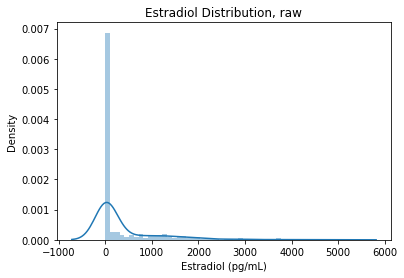

c:\Users\KatherineRidley\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


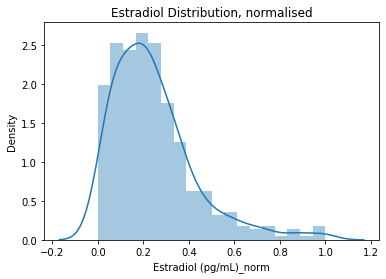

c:\Users\KatherineRidley\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


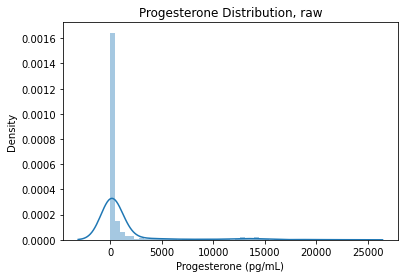

c:\Users\KatherineRidley\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


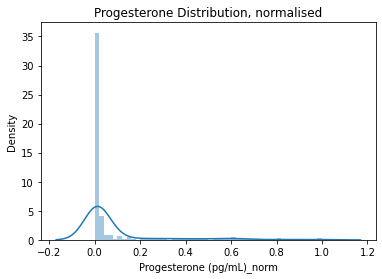

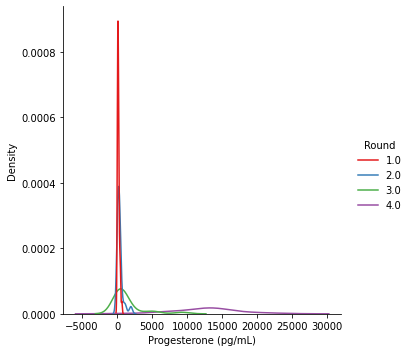

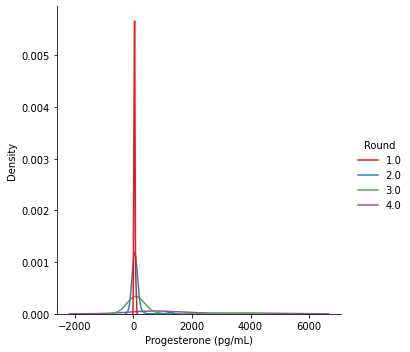

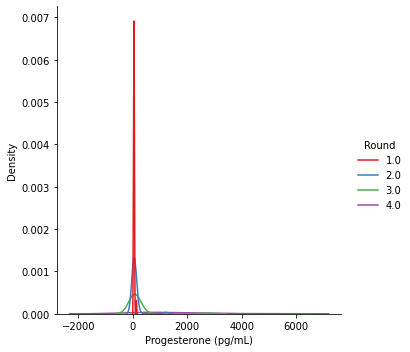

c:\Users\KatherineRidley\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


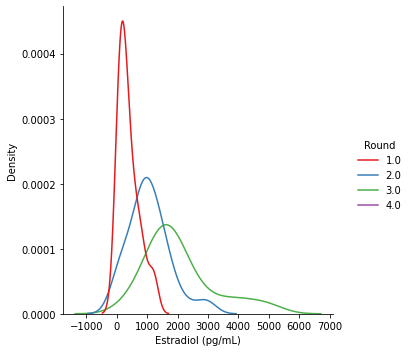

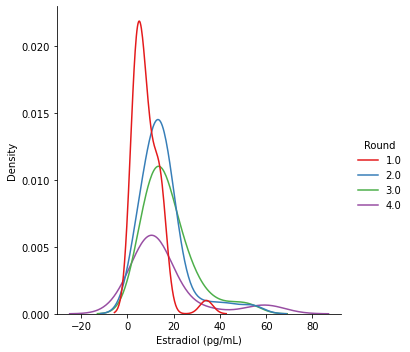

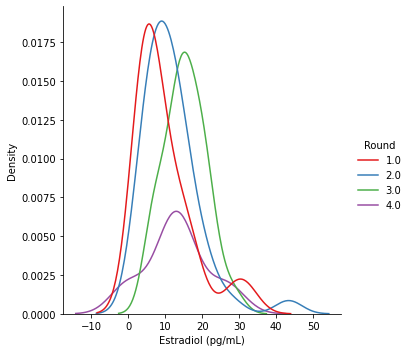

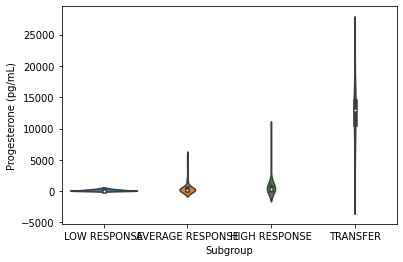

<AxesSubplot:xlabel='Subgroup', ylabel='Estradiol (pg/mL)'>

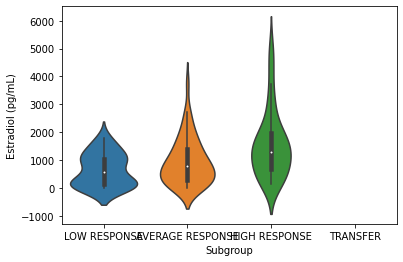

In [5]:
## DISTRIBUTION PLOTS FOR OUTLIER DETECTION
data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522_3std_zscore_wgroupb.csv'))

f=sns.distplot(data['Estradiol (pg/mL)'])
f.set_title('Estradiol Distribution, raw')
plt.show()
plt.close()
g=sns.distplot(data['Estradiol (pg/mL)_norm'])
g.set_title('Estradiol Distribution, normalised')
plt.show()
plt.close()
h=sns.distplot(data['Progesterone (pg/mL)'])
h.set_title('Progesterone Distribution, raw')
plt.show()
plt.close()
i=sns.distplot(data['Progesterone (pg/mL)_norm'])
i.set_title('Progesterone Distribution, normalised')
plt.show()
plt.close()
samples = list(data['SampleType'].unique())
#for s in samples:

#fig, (j, k, l) = plt.subplots(3, 1, sharex=True, sharey=True)
data1=data.loc[data['SampleType']=='Blood Clinic']
j=sns.displot(data=data1, x="Progesterone (pg/mL)", hue="Round", palette="Set1", kind="kde")
#j.set_title('Progesterone Distribution, Blood Clinic')
plt.show()
plt.close()
#j.set_title('Blood Samples')
data2=data.loc[data['SampleType']=='Saliva Clinic']
sns.displot(data=data2, x="Progesterone (pg/mL)", hue="Round", palette="Set1", kind="kde")
plt.show()
plt.close()
#k.set_title('Saliva Clinic Samples')
data3=data.loc[data['SampleType']=='Saliva Fasting']
sns.displot(data=data3, x="Progesterone (pg/mL)", hue="Round", palette="Set1", kind="kde")
plt.show()
plt.close()

data1=data.loc[data['SampleType']=='Blood Clinic']
j=sns.displot(data=data1, x="Estradiol (pg/mL)", hue="Round", palette="Set1", kind="kde")
#j.set_title('Progesterone Distribution, Blood Clinic')
plt.show()
plt.close()
#j.set_title('Blood Samples')
data2=data.loc[data['SampleType']=='Saliva Clinic']
sns.displot(data=data2, x="Estradiol (pg/mL)", hue="Round", palette="Set1", kind="kde")
plt.show()
plt.close()
#k.set_title('Saliva Clinic Samples')
data3=data.loc[data['SampleType']=='Saliva Fasting']
sns.displot(data=data3, x="Estradiol (pg/mL)", hue="Round", palette="Set1", kind="kde")
plt.show()
plt.close()

sns.violinplot(x="Subgroup", y="Progesterone (pg/mL)", data=data1)
plt.show()
plt.close()
sns.violinplot(x="Subgroup", y="Estradiol (pg/mL)", data=data1)

#l.set_title('Saliva Fasting Samples')

<Figure size 432x288 with 0 Axes>

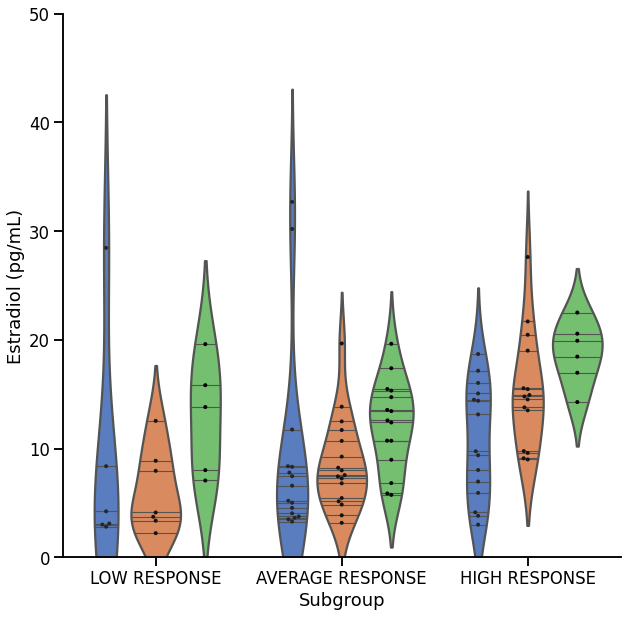

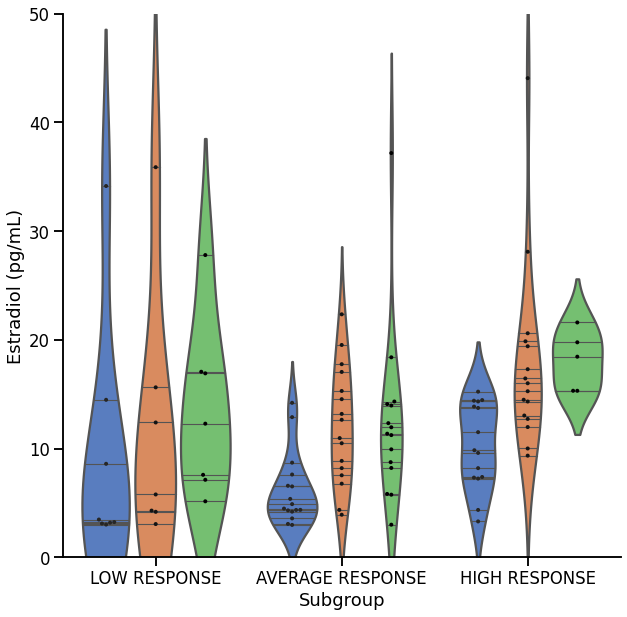

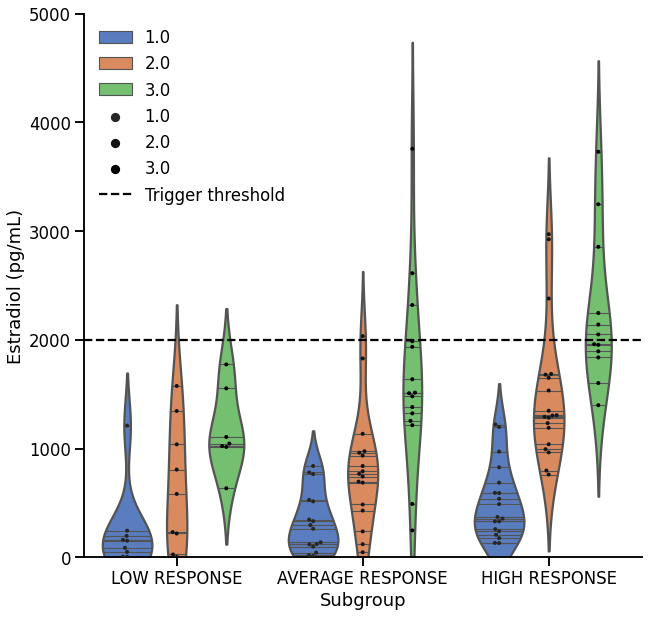

In [92]:
data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522_3std_zscore.csv'))
from numpy import mean
data=data.loc[data['SampleType']=='Saliva Fasting']
#sns.violinplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', data=data)
plt.show()
plt.close()
sns.set_context('talk')
sns.despine()
ax = plt.figure(figsize=(10,10))
ax = sns.violinplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', inner = 'stick', hue_order=[1.0,2.0,3.0], data=data, palette='muted',legend=False)
#ax = sns.violinplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', inner = 'box', hue_order=[1.0,2.0,3.0], data=data, palette='muted',legend=False)
ax = sns.swarmplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', hue_order=[1.0,2.0,3.0],
 data=data, dodge=True, color='black', size=4)
#AX = sns.pointplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', 
#hue_order=[1.0,2.0,3.0], data=data, dodge=True, estimator=mean)
#ax.set_ylim(-50,5000)
ax.legend(loc='upper center', frameon=False)
plt.legend([],[], frameon=False)
ax.set_ylim(0,50)
sns.despine()
#sns.despine(left=True)
data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522_3std_zscore.csv'))
data=data.loc[data['SampleType']=='Saliva Clinic']
#sns.violinplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', data=data)
plt.show()
plt.close()
sns.set_context('talk')
ax = plt.figure(figsize=(10,10))
ax = sns.violinplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', inner = 'stick', hue_order=[1.0,2.0,3.0], data=data, palette='muted', legend=False)
ax = sns.swarmplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', hue_order=[1.0,2.0,3.0], data=data, dodge=True, color='black', size=4)
ax.set_ylim(0,50)
sns.despine()
ax.legend(loc='upper center', frameon=False)
plt.legend([],[], frameon=False)

data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522_3std_zscore.csv'))
data=data.loc[data['SampleType']=='Blood Clinic']
#sns.violinplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', data=data)
plt.show()
plt.close()
sns.set_context('talk')
ax = plt.figure(figsize=(10,10))
ax = sns.violinplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', inner = 'stick', hue_order=[1.0,2.0,3.0], data=data, palette='muted', legend=False)
ax = sns.swarmplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', hue_order=[1.0,2.0,3.0], data=data, dodge=True, color='black', size=4)
ax.set_ylim(0,5000)

sns.despine()
ax.legend(loc='upper center', frameon=False)
plt.axhline(2000, color='black', linestyle='--', label='Trigger threshold') 
plt.legend(frameon=False, loc='upper left')
#plt.legend(bbox_to_anchor =(0.65, 1.25))
#ax = plt.figure(figsize=(15,10))
#ax = sns.boxplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', hue_order=[1.0,2.0,3.0], data=data)
#ax = sns.swarmplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', hue_order=[1.0,2.0,3.0], data=data, dodge=True, color="gray")
#ax.set_ylim(-50,5000)


<Figure size 432x288 with 0 Axes>

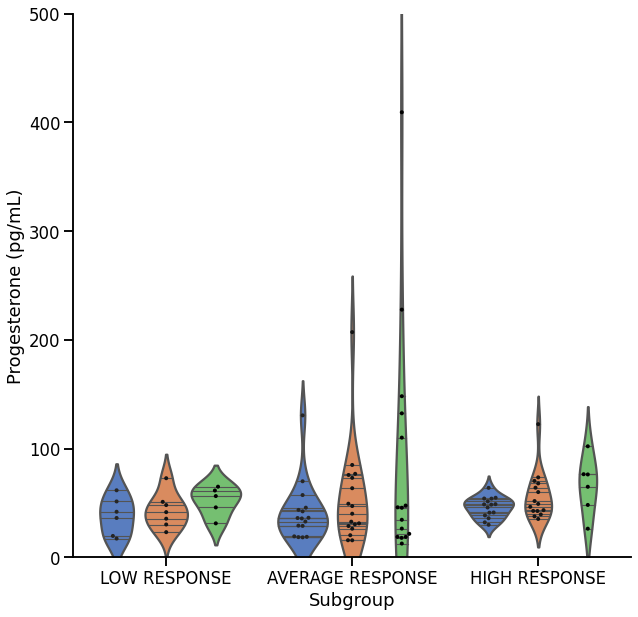

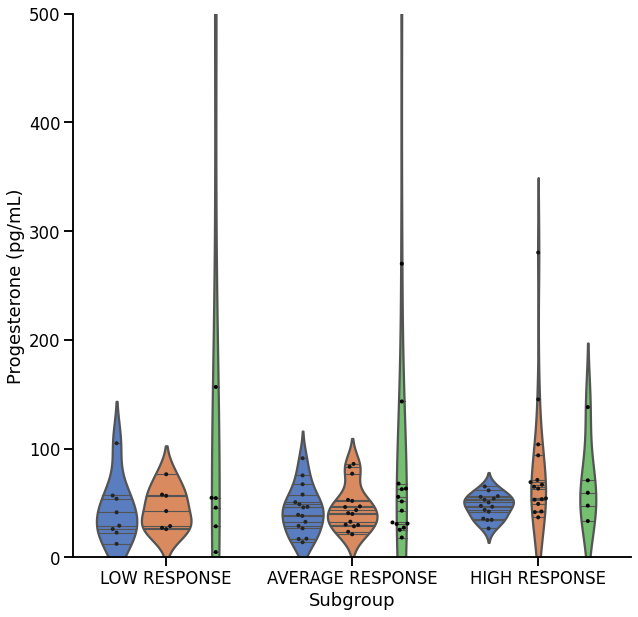

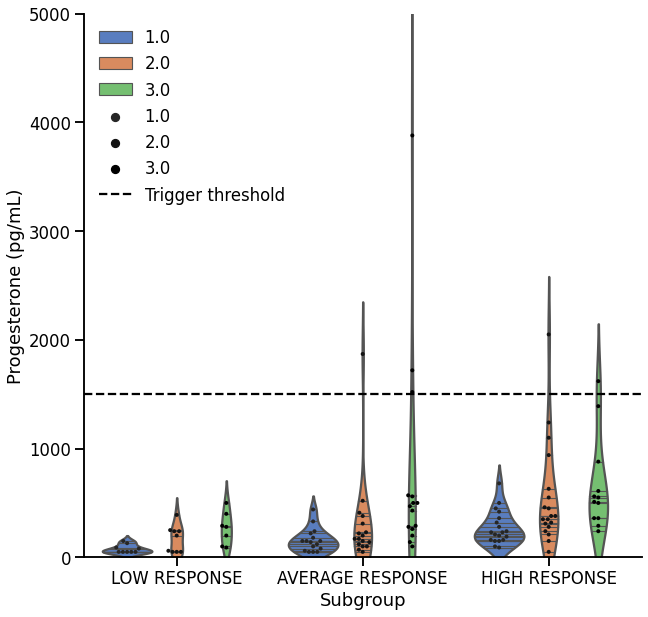

In [97]:
data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522_3std_zscore.csv'))
from numpy import mean
data=data.loc[data['SampleType']=='Saliva Fasting']
#sns.violinplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', data=data)
plt.show()
plt.close()
sns.set_context('talk')
sns.despine()
ax = plt.figure(figsize=(10,10))
ax = sns.violinplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', inner = 'stick', hue_order=[1.0,2.0,3.0], data=data, palette='muted',legend=False)
#ax = sns.violinplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', inner = 'box', hue_order=[1.0,2.0,3.0], data=data, palette='muted',legend=False)
ax = sns.swarmplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', hue_order=[1.0,2.0,3.0],
 data=data, dodge=True, color='black', size=4)
#AX = sns.pointplot(x="Subgroup", y="Estradiol (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', 
#hue_order=[1.0,2.0,3.0], data=data, dodge=True, estimator=mean)
#ax.set_ylim(-50,5000)
ax.legend(loc='upper center', frameon=False)
plt.legend([],[], frameon=False)
ax.set_ylim(0,500)
sns.despine()
#sns.despine(left=True)
data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522_3std_zscore.csv'))
data=data.loc[data['SampleType']=='Saliva Clinic']
#sns.violinplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', data=data)
plt.show()
plt.close()
sns.set_context('talk')
ax = plt.figure(figsize=(10,10))
ax = sns.violinplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', inner = 'stick', hue_order=[1.0,2.0,3.0], data=data, palette='muted', legend=False)
ax = sns.swarmplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', hue_order=[1.0,2.0,3.0], data=data, dodge=True, color='black', size=4)
ax.set_ylim(0,500)
sns.despine()
ax.legend(loc='upper center', frameon=False)
plt.legend([],[], frameon=False)

data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522_3std_zscore.csv'))
data=data.loc[data['SampleType']=='Blood Clinic']
#sns.violinplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', data=data)
plt.show()
plt.close()
sns.set_context('talk')
ax = plt.figure(figsize=(10,10))
ax = sns.violinplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', inner = 'stick', hue_order=[1.0,2.0,3.0], data=data, palette='muted', legend=False)
ax = sns.swarmplot(x="Subgroup", y="Progesterone (pg/mL)", order=['LOW RESPONSE', 'AVERAGE RESPONSE', 'HIGH RESPONSE'], hue='Round', hue_order=[1.0,2.0,3.0], data=data, dodge=True, color='black', size=4)
ax.set_ylim(0,5000)

sns.despine()
ax.legend(loc='upper center', frameon=False)
plt.axhline(1500, color='black', linestyle='--', label='Trigger threshold') 
plt.legend(frameon=False, loc='upper left')

### Linear regression analysis and visualisation:

In [ ]:
data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522.csv'))
variables = ['TOD', 'TimeH', 'Subgroup_numeric', 'Sample_1=SF_1.5=SC_2=BC', 'Round']
#print(data)
#data=data[data['Time_clinic']<12]
#data=data[data['Sample_1=SF_1.5=SC_2=BC']!=1.5]

#define response variable
y = data['Estradiol (pg/mL)']

#define explanatory variable
x = data['Time_clinic']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y.astype(float), x.astype(float)).fit()

#view model summary
print(model.summary())
print(model.pvalues[1])
#print(model.t_test([1, 0]))

fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'Subgroup_numeric', fig=fig)

In [ ]:
### Generating bar graphs of trends in the data, e.g. plotting hormone data based on Round and Time of Day variables

data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522.csv'))
#print(data[data['SampleType']=='Saliva Clinic'])
#print(data.columns)
hormones= ['Estradiol (pg/mL)_norm']
samples = list(data['SampleType'].unique())
print(samples)
for h in hormones:
    for s in samples:
        print(h,s)
#fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,8))#sharex=True)
        fig=plt.figure(figsize=(12,8))
        #data=data[data['SampleType']=='Saliva Fasting']
        #print(data)
        data=data.loc[data['SampleType']==s]
        print(data)
        #data=data[data[h]>0]
        print(data.shape)
        ax1=sns.barplot(data=data,
         x=data['Round'],
          y=data[h], 
          hue=data['Time_of_Day'], 
          hue_order=['<1200', '>1200|<1600', '>1600'])
        #data.plot(x='Time_clinic', y='Progesterone (pg/mL)_norm')
        #ax1=sns.swarmplot(data=data, x=data['Time_clinic'], y=data['Progesterone (pg/mL)_norm'], palette='pastel', dodge=True)
        #ax1.set_ylim([0,0.3])
        ax1.set_title('{0}: {1} by Time of Day and round of treatment'.format(s, h))
        plt.savefig(os.path.join(path,"{}_{}_by_Time_of_Day_and_round_of_treatment_300522.png".format(s, h[:4])))

In [ ]:
### Generating bar graphs of sample types by hormone, segmenting data based on time of day

fig=plt.figure(figsize=(12,8))
subgroups=list(data['Subgroup'].unique())
hormones = ['Progesterone (pg/mL)_norm', 'Estradiol (pg/mL)_norm']

for h in hormones:
    #for s in subgroups:
    data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522.csv'))
#data=data[data['SampleType']=='Saliva Fasting']
#print(data)
    data=data.loc[data['Time_of_Day']=='<1200']
    #print(data)
    data=data[data[h]>0]
    #print(data.shape)
    ax1=plt.figure(figsize=(8,4))
    ax1=sns.barplot(data=data,
        x=data['SampleType'],
        y=data[h], 
        #hue=data['SampleType'],
        order=['Saliva Fasting', 'Saliva Clinic', 'Blood Clinic'])
    ax1.set_title('{0}:Sample types with morning clinic visits'.format(h))
    plt.savefig(os.path.join(path,'{}_Morning_only_300522.png'.format(h[:4])))
    plt.show()

### Cleaning and manipulating data for whole dataset correlation coefficient analysis:

(0.48307159589682963, 1.4998233897669236e-05)
(0.7812779134231941, 3.9078635153727637e-10)
(0.19151280748648852, 0.31963213933428003)
(0.6529240188091333, 3.8485079453214457e-10)
(0.851677984859317, 2.3333721511463486e-13)
(0.49702630733329833, 0.006089218529785402)


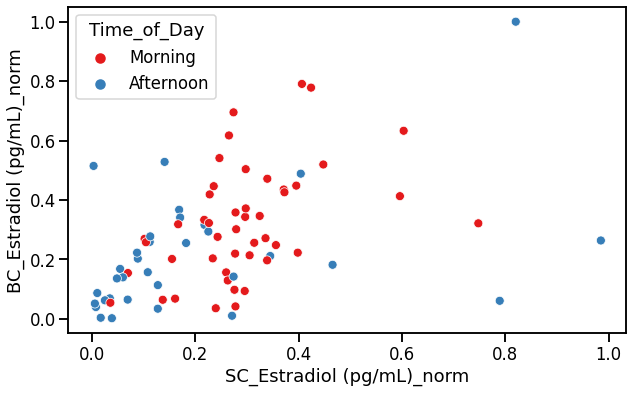

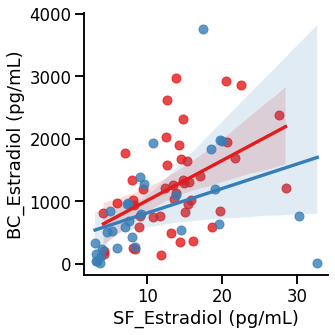

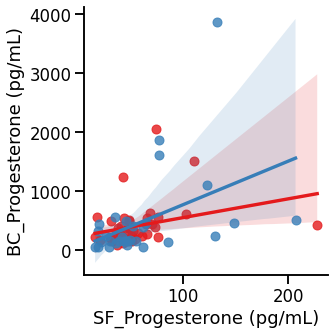

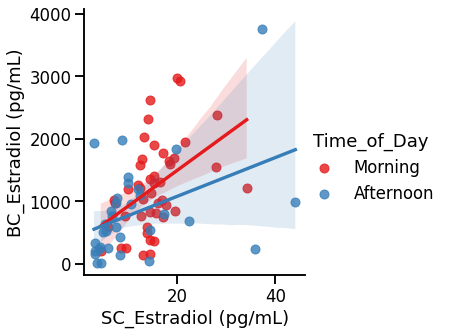

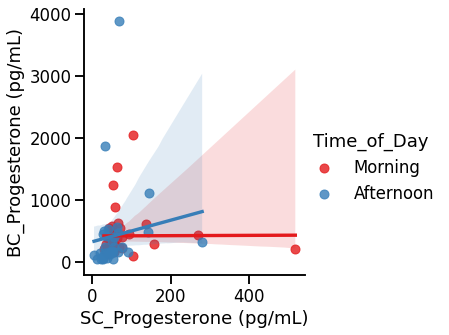

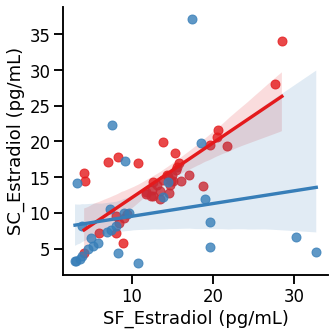

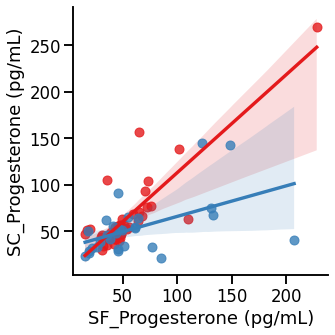

In [107]:
data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522_zscore.csv'))

data.loc[(data['SampleType']=='Saliva Fasting'), 'SF_Estradiol (pg/mL)_norm']=data.loc[(data['SampleType']=='Saliva Fasting'), 'Estradiol (pg/mL)_norm']
data.loc[(data['SampleType']=='Saliva Clinic'), 'SC_Estradiol (pg/mL)_norm']=data.loc[(data['SampleType']=='Saliva Clinic'), 'Estradiol (pg/mL)_norm']
data.loc[(data['SampleType']=='Blood Clinic'), 'BC_Estradiol (pg/mL)_norm']=data.loc[(data['SampleType']=='Blood Clinic'), 'Estradiol (pg/mL)_norm']
data.loc[(data['SampleType']=='Saliva Fasting'), 'SF_Progesterone (pg/mL)_norm']=data.loc[(data['SampleType']=='Saliva Fasting'), 'Progesterone (pg/mL)_norm']
data.loc[(data['SampleType']=='Saliva Clinic'), 'SC_Progesterone (pg/mL)_norm']=data.loc[(data['SampleType']=='Saliva Clinic'), 'Progesterone (pg/mL)_norm']
data.loc[(data['SampleType']=='Blood Clinic'), 'BC_Progesterone (pg/mL)_norm']=data.loc[(data['SampleType']=='Blood Clinic'), 'Progesterone (pg/mL)_norm']

data.loc[(data['SampleType']=='Saliva Fasting'), 'SF_Estradiol (pg/mL)']=data.loc[(data['SampleType']=='Saliva Fasting'), 'Estradiol (pg/mL)']
data.loc[(data['SampleType']=='Saliva Clinic'), 'SC_Estradiol (pg/mL)']=data.loc[(data['SampleType']=='Saliva Clinic'), 'Estradiol (pg/mL)']
data.loc[(data['SampleType']=='Blood Clinic'), 'BC_Estradiol (pg/mL)']=data.loc[(data['SampleType']=='Blood Clinic'), 'Estradiol (pg/mL)']
data.loc[(data['SampleType']=='Saliva Fasting'), 'SF_Progesterone (pg/mL)']=data.loc[(data['SampleType']=='Saliva Fasting'), 'Progesterone (pg/mL)']
data.loc[(data['SampleType']=='Saliva Clinic'), 'SC_Progesterone (pg/mL)']=data.loc[(data['SampleType']=='Saliva Clinic'), 'Progesterone (pg/mL)']
data.loc[(data['SampleType']=='Blood Clinic'), 'BC_Progesterone (pg/mL)']=data.loc[(data['SampleType']=='Blood Clinic'), 'Progesterone (pg/mL)']

ids = list(data['Patient ID'].unique())
rounds = list(data['Round'].unique())

newdata={'ID':[], 'Round':[], 'Time_clinic':[], 'Subgroup':[], 'Subgroup_numeric':[], 'Time_of_Day':[], 'SF_Estradiol (pg/mL)_norm':[], 'SC_Estradiol (pg/mL)_norm':[], 'BC_Estradiol (pg/mL)_norm':[], 'SF_Progesterone (pg/mL)_norm':[], 'SC_Progesterone (pg/mL)_norm':[], 'BC_Progesterone (pg/mL)_norm':[],
'SF_Estradiol (pg/mL)':[], 'SC_Estradiol (pg/mL)':[], 'BC_Estradiol (pg/mL)':[], 'SF_Progesterone (pg/mL)':[], 'SC_Progesterone (pg/mL)':[], 'BC_Progesterone (pg/mL)':[], 
'SF_Estradiol (pg/mL)_quartiles':[], 'SC_Estradiol (pg/mL)_quartiles':[], 'BC_Estradiol (pg/mL)_quartiles':[], 'SF_Progesterone (pg/mL)_quartiles':[], 'SC_Progesterone (pg/mL)_quartiles':[], 'BC_Progesterone (pg/mL)_quartiles':[]}

for i in ids:
    for r in rounds:
        newdata['ID'].append(i)
        newdata['Round'].append(r)

        #print(i,r, data.loc[(data['Patient ID']==i) & (data['Round']==r), 'Time_clinic'].values[0])
        if len (data.loc[(data['Patient ID']==i) & (data['Round']==r), 'Time_clinic'].values)==0:
            newdata['Time_clinic'].append(np.nan)
            newdata['Time_of_Day'].append(np.nan)
        else:
            newdata['Time_clinic'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r), 'Time_clinic'].values[0])
            newdata['Time_of_Day'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r), 'Time_of_Day'].values[0])
        if len (data.loc[(data['Patient ID']==i) & (data['Round']==r), 'Subgroup'].values)==0:
            newdata['Subgroup'].append(np.nan)
            newdata['Subgroup_numeric'].append(np.nan)
        else:
            newdata['Subgroup'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r), 'Subgroup'].values[0])
            newdata['Subgroup_numeric'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r), 'Subgroup_numeric'].values[0])
        #print(len(data.loc[(data['Patient ID']==i) & (data['Round']==r)]))
        if len(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Fasting')])==0:
            #print('no fasting data')
            newdata['SF_Estradiol (pg/mL)_norm'].append(np.nan)
            newdata['SF_Progesterone (pg/mL)_norm'].append(np.nan)
            newdata['SF_Estradiol (pg/mL)'].append(np.nan)
            newdata['SF_Progesterone (pg/mL)'].append(np.nan)
            newdata['SF_Estradiol (pg/mL)_quartiles'].append(np.nan)
            newdata['SF_Progesterone (pg/mL)_quartiles'].append(np.nan)
        else:
            newdata['SF_Estradiol (pg/mL)_norm'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Fasting'), 'Estradiol (pg/mL)_norm'].values[0])
            newdata['SF_Progesterone (pg/mL)_norm'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Fasting'), 'Progesterone (pg/mL)_norm'].values[0])
            newdata['SF_Estradiol (pg/mL)'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Fasting'), 'Estradiol (pg/mL)'].values[0])
            newdata['SF_Progesterone (pg/mL)'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Fasting'), 'Progesterone (pg/mL)'].values[0])
            newdata['SF_Estradiol (pg/mL)_quartiles'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Fasting'), 'Estradiol (pg/mL)_quartiles'].values[0])
            newdata['SF_Progesterone (pg/mL)_quartiles'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Fasting'), 'Progesterone (pg/mL)_quartiles'].values[0])
        if len(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Clinic')])==0:
            #print('no clinic data')
            newdata['SC_Estradiol (pg/mL)_norm'].append(np.nan)
            newdata['SC_Progesterone (pg/mL)_norm'].append(np.nan)
            newdata['SC_Estradiol (pg/mL)'].append(np.nan)
            newdata['SC_Progesterone (pg/mL)'].append(np.nan)
            newdata['SC_Estradiol (pg/mL)_quartiles'].append(np.nan)
            newdata['SC_Progesterone (pg/mL)_quartiles'].append(np.nan)
        else:
            newdata['SC_Estradiol (pg/mL)_norm'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Clinic'), 'Estradiol (pg/mL)_norm'].values[0])
            newdata['SC_Progesterone (pg/mL)_norm'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Clinic'), 'Progesterone (pg/mL)_norm'].values[0])
            newdata['SC_Estradiol (pg/mL)'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Clinic'), 'Estradiol (pg/mL)'].values[0])
            newdata['SC_Progesterone (pg/mL)'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Clinic'), 'Progesterone (pg/mL)'].values[0])
            newdata['SC_Estradiol (pg/mL)_quartiles'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Clinic'), 'Estradiol (pg/mL)_quartiles'].values[0])
            newdata['SC_Progesterone (pg/mL)_quartiles'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Saliva Clinic'), 'Progesterone (pg/mL)_quartiles'].values[0])
        if len(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Blood Clinic')])==0:
            #print('no blood clinic data')
            newdata['BC_Estradiol (pg/mL)_norm'].append(np.nan)
            newdata['BC_Progesterone (pg/mL)_norm'].append(np.nan)
            newdata['BC_Estradiol (pg/mL)'].append(np.nan)
            newdata['BC_Progesterone (pg/mL)'].append(np.nan)
            newdata['BC_Estradiol (pg/mL)_quartiles'].append(np.nan)
            newdata['BC_Progesterone (pg/mL)_quartiles'].append(np.nan)


        else:
            newdata['BC_Estradiol (pg/mL)_norm'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Blood Clinic'), 'Estradiol (pg/mL)_norm'].values[0])
            newdata['BC_Progesterone (pg/mL)_norm'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Blood Clinic'), 'Progesterone (pg/mL)_norm'].values[0])
            newdata['BC_Estradiol (pg/mL)'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Blood Clinic'), 'Estradiol (pg/mL)'].values[0])
            newdata['BC_Progesterone (pg/mL)'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Blood Clinic'), 'Progesterone (pg/mL)'].values[0])
            newdata['BC_Estradiol (pg/mL)_quartiles'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Blood Clinic'), 'Estradiol (pg/mL)_quartiles'].values[0])
            newdata['BC_Progesterone (pg/mL)_quartiles'].append(data.loc[(data['Patient ID']==i) & (data['Round']==r) & (data['SampleType']=='Blood Clinic'), 'Progesterone (pg/mL)_quartiles'].values[0])
        
        
    datan=pd.DataFrame(newdata)
    datan.dropna()
    #print(datan)
    datan.to_csv(os.path.join(path,"aggregate_data_for_pearson_analysis.csv"))


### Data handling for visualisation and analysis:


    #print(datan)
datan=pd.read_csv(os.path.join(path,"aggregate_data_for_pearson_analysis.csv"))
#datan.replace(np.nan, 0, inplace=True)
#print(datan)
fig=plt.figure(figsize=(10,6))
#fig,ax = plt.figure(figsize=(10,15))
datan.Time_of_Day.replace(to_replace=['>1600'], value=[np.nan], inplace=True)
datan.Time_of_Day.replace(to_replace=['<1200', '>1200|<1600'], value=['Morning', 'Afternoon'], inplace=True)
datan.Time_of_Day.replace(to_replace=[0], value=[np.nan], inplace=True)

### Scatter plots and line fitting:


ax=sns.scatterplot(data=datan, x='SC_Estradiol (pg/mL)_norm', y='BC_Estradiol (pg/mL)_norm', hue='Time_of_Day', legend='full', palette='Set1')
#ax.set_title('Estradiol: Saliva (home) and serum (clinic), pearson coefficient: '+str(stats.pearsonr(datan['SC_Estradiol (pg/mL)_norm'], datan['BC_Estradiol (pg/mL)_norm'])[0]))
#fig=sns.lmplot(x='SC_Progesterone (pg/mL)_norm', y='BC_Progesterone (pg/mL)_norm', data=datan, legend='full', palette='Set1')
#datan['SF_Progesterone (pg/mL)_norm']== (datan['BC_Progesterone (pg/mL)_norm']-datan['SF_Progesterone (pg/mL)_norm'])+0.5
#datan['SF_Progesterone (pg/mL)_norm']=datan.loc[datan['Time_of_Day']=='Morning', 'BC_Progesterone (pg/mL)_norm']*0.5
#datan.loc[datan['Time_of_Day']=='Morning', 'SC_Progesterone (pg/mL)_norm']=datan.loc[datan['Time_of_Day']=='Morning', 'SC_Progesterone (pg/mL)_norm']*0.5
#datan.loc[(datan['Time_of_Day']=='Morning'), 'SF_Progesterone (pg/mL)_norm']=datan.loc[(datan['Time_of_Day']=='Morning'), 'BC_Progesterone (pg/mL)_norm']*0.8
sns.set_context('talk')
fig=sns.lmplot(x='SF_Estradiol (pg/mL)', y='BC_Estradiol (pg/mL)', data=datan, hue='Time_of_Day', legend=False, palette='Set1')
fig=sns.lmplot(x='SF_Progesterone (pg/mL)', y='BC_Progesterone (pg/mL)', data=datan, hue='Time_of_Day', legend=False, palette='Set1')
fig=sns.lmplot(x='SC_Estradiol (pg/mL)', y='BC_Estradiol (pg/mL)', data=datan, hue='Time_of_Day', legend='full', palette='Set1')
fig=sns.lmplot(x='SC_Progesterone (pg/mL)', y='BC_Progesterone (pg/mL)', data=datan, hue='Time_of_Day', legend='full', palette='Set1')
fig=sns.lmplot(x='SF_Estradiol (pg/mL)', y='SC_Estradiol (pg/mL)', data=datan, hue='Time_of_Day', legend=False, palette='Set1')
fig=sns.lmplot(x='SF_Progesterone (pg/mL)', y='SC_Progesterone (pg/mL)', data=datan, hue='Time_of_Day', legend=False, palette='Set1')

#fig.set_xlabel('Saliva (Clinic) Progesterone (pg/mL)')
#print(stats.pearsonr(datamorning['SF_Estradiol (pg/mL)_norm'], datamorning['BC_Estradiol (pg/mL)_norm']))
#ax.set_title('Saliva Fasting & Blood Clinic: Pearson coefficient and p-value', stats.pearsonr(datan['SF_Estradiol (pg/mL)_norm'], datan['BC_Estradiol (pg/mL)_norm']))


### Pearson correlation:

datan.dropna(inplace=True)
datamorning= datan.loc[datan['Time_clinic']<12]
dataaft= datan.loc[datan['Time_of_Day']=='Afternoon']

#dataevening= datan.loc[datan['Time_of_Day']=='>1600']

#print(datamorning)
print(stats.pearsonr(datan['SC_Estradiol (pg/mL)_norm'], datan['SF_Estradiol (pg/mL)_norm']))
print(stats.pearsonr(datamorning['SC_Estradiol (pg/mL)_norm'], datamorning['SF_Estradiol (pg/mL)_norm']))
print(stats.pearsonr(dataaft['SC_Estradiol (pg/mL)_norm'], dataaft['SF_Estradiol (pg/mL)_norm']))
print(stats.pearsonr(datan['SC_Progesterone (pg/mL)_norm'], datan['SF_Progesterone (pg/mL)_norm']))
print(stats.pearsonr(datamorning['SC_Progesterone (pg/mL)_norm'], datamorning['SF_Progesterone (pg/mL)_norm']))
print(stats.pearsonr(dataaft['SC_Progesterone (pg/mL)_norm'], dataaft['SF_Progesterone (pg/mL)_norm']))

     Unnamed: 0    ID  Round  Time_clinic       Subgroup  Subgroup_numeric  \
0             0   1.0    1.0         11.0   LOW RESPONSE               1.0   
1             1   1.0    2.0         10.0   LOW RESPONSE               1.0   
2             2   1.0    3.0         13.0   LOW RESPONSE               1.0   
4             4   4.0    1.0          9.0   LOW RESPONSE               1.0   
5             5   4.0    2.0          9.0   LOW RESPONSE               1.0   
..          ...   ...    ...          ...            ...               ...   
166         166  77.0    3.0         10.0  HIGH RESPONSE               3.0   
168         168  78.0    1.0          9.0  HIGH RESPONSE               3.0   
169         169  78.0    2.0         10.0  HIGH RESPONSE               3.0   
170         170  78.0    3.0         13.0  HIGH RESPONSE               3.0   
173         173  79.0    2.0         11.0  HIGH RESPONSE               3.0   

    Time_of_Day  SF_Estradiol (pg/mL)_norm  SC_Estradiol (pg/mL

AttributeError: 'OLSResults' object has no attribute 'coef_'

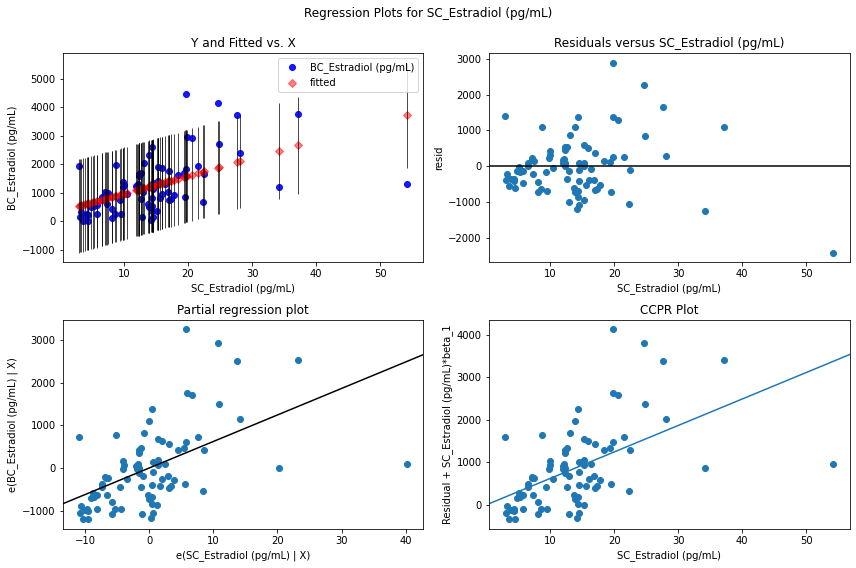

In [66]:
variables = ['TOD', 'TimeH', 'Subgroup_numeric', 'Sample_1=SF_1.5=SC_2=BC', 'Round']
data = datan
#data = data.loc[data['Subgroup']!='TRANSFER']

#data['Estradiol (pg/mL)_reg_y=132x']
#print(data)
#data=data[data['Time_clinic']<12]
#data=data[data['Sample_1=SF_1.5=SC_2=BC']!=1.5]
print(data)
#define response variable
y = data['BC_Estradiol (pg/mL)']

#define explanatory variable
x = data['SC_Estradiol (pg/mL)']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y.astype(float), x.astype(float)).fit()

#view model summary
print(model.summary())
print(model.pvalues[1])
#print(model.t_test([1, 0]))

fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'SC_Estradiol (pg/mL)', fig=fig)

print(model.coef_[0], model.intercept_)

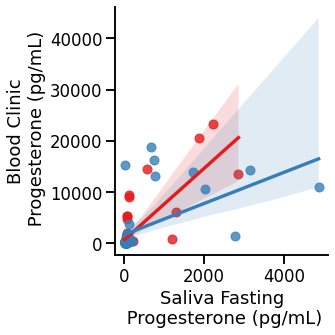

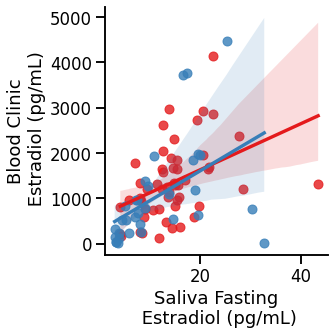

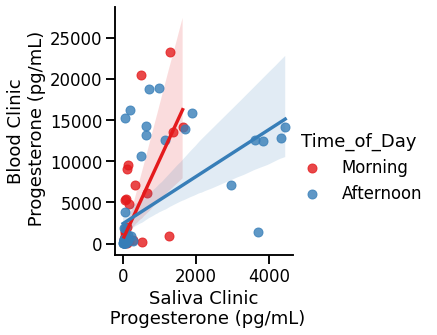

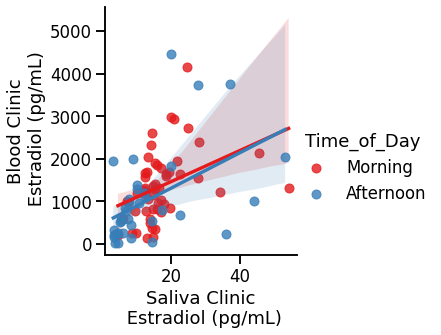

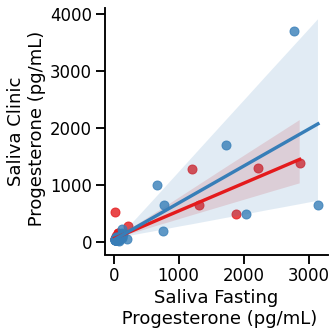

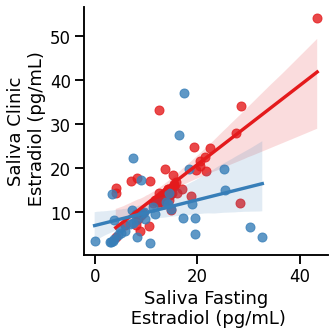

In [9]:

datan=pd.read_csv(os.path.join(path,"aggregate_data_for_pearson_analysis_99_omit.csv"))
datan=datan.rename(columns = {'BC_Estradiol (pg/mL)_norm':'Blood Clinic\n Estradiol (pg/mL)_norm', 'BC_Progesterone (pg/mL)_norm':'Blood Clinic\n Progesterone (pg/mL)_norm', 
'SC_Estradiol (pg/mL)_norm':'Saliva Clinic\n Estradiol (pg/mL)_norm', 'SC_Progesterone (pg/mL)_norm':'Saliva Clinic\n Progesterone (pg/mL)_norm', 
'SF_Estradiol (pg/mL)_norm':'Saliva Fasting\n Estradiol (pg/mL)_norm', 'SF_Progesterone (pg/mL)_norm':'Saliva Fasting\n Progesterone (pg/mL)_norm',
 'BC_Estradiol (pg/mL)':'Blood Clinic\n Estradiol (pg/mL)', 'BC_Progesterone (pg/mL)':'Blood Clinic\n Progesterone (pg/mL)', 
'SC_Estradiol (pg/mL)':'Saliva Clinic\n Estradiol (pg/mL)', 'SC_Progesterone (pg/mL)':'Saliva Clinic\n Progesterone (pg/mL)', 
'SF_Estradiol (pg/mL)':'Saliva Fasting\n Estradiol (pg/mL)', 'SF_Progesterone (pg/mL)':'Saliva Fasting\n Progesterone (pg/mL)',
 'Time_clinic': 'Hour of clinic visit', 'Round' : 'Round of treatment'})

 # time of day replaced with hour of clinic visit
datan['Time_of_Day'].replace(to_replace=['<1200', '>1200|<1600', '>1600'], value=['Morning', 'Afternoon', np.nan], inplace=True)

sns.set_context('talk')

fig=sns.lmplot(x='Saliva Fasting\n Progesterone (pg/mL)', y='Blood Clinic\n Progesterone (pg/mL)', data=datan, hue='Time_of_Day', legend=False, palette='Set1')
fig=sns.lmplot(x='Saliva Fasting\n Estradiol (pg/mL)', y='Blood Clinic\n Estradiol (pg/mL)', data=datan, hue='Time_of_Day', legend=False, palette='Set1')
fig=sns.lmplot(x='Saliva Clinic\n Progesterone (pg/mL)', y='Blood Clinic\n Progesterone (pg/mL)', data=datan, hue='Time_of_Day', legend='full', palette='Set1')
fig=sns.lmplot(x='Saliva Clinic\n Estradiol (pg/mL)', y='Blood Clinic\n Estradiol (pg/mL)', data=datan, hue='Time_of_Day', legend='full', palette='Set1')
fig=sns.lmplot(x='Saliva Fasting\n Progesterone (pg/mL)', y='Saliva Clinic\n Progesterone (pg/mL)', data=datan, hue='Time_of_Day', legend=False, palette='Set1')
fig=sns.lmplot(x='Saliva Fasting\n Estradiol (pg/mL)', y='Saliva Clinic\n Estradiol (pg/mL)', data=datan, hue='Time_of_Day', legend=False, palette='Set1')



In [14]:
data=pd.read_csv(os.path.join(path,"aggregate_data_for_pearson_analysis_wgroupb.csv"))
print(data)
datathresh=data.loc[data['BC_Progesterone (pg/mL)']>1500]

print(datathresh)

     Unnamed: 0    ID  Round  Time_clinic       Subgroup  Subgroup_numeric  \
0             0   1.0    1.0         11.0   LOW RESPONSE               1.0   
1             1   1.0    2.0         10.0   LOW RESPONSE               1.0   
2             2   1.0    3.0         13.0   LOW RESPONSE               1.0   
3             3   4.0    1.0          9.0   LOW RESPONSE               1.0   
4             4   4.0    2.0          9.0   LOW RESPONSE               1.0   
..          ...   ...    ...          ...            ...               ...   
127         127   7.0    2.0         12.0   LOW RESPONSE               1.0   
128         128   7.0    3.0         11.0   LOW RESPONSE               1.0   
129         129  71.0    1.0          8.0  HIGH RESPONSE               3.0   
130         130  71.0    2.0          8.0  HIGH RESPONSE               3.0   
131         131  71.0    3.0          8.0  HIGH RESPONSE               3.0   

     Time_of_Day  SF_Estradiol (pg/mL)_norm  SC_Estradiol (pg/m

Index(['Unnamed: 0', 'ID', 'Round', 'Time_clinic', 'Subgroup',
       'Subgroup_numeric', 'Time_of_Day', 'SF_Estradiol (pg/mL)_norm',
       'SC_Estradiol (pg/mL)_norm', 'BC_Estradiol (pg/mL)_norm',
       'SF_Progesterone (pg/mL)_norm', 'SC_Progesterone (pg/mL)_norm',
       'BC_Progesterone (pg/mL)_norm', 'SF_Estradiol (pg/mL)',
       'SC_Estradiol (pg/mL)', 'BC_Estradiol (pg/mL)',
       'SF_Progesterone (pg/mL)', 'SC_Progesterone (pg/mL)',
       'BC_Progesterone (pg/mL)', 'SF_Estradiol (pg/mL)_quartiles',
       'SC_Estradiol (pg/mL)_quartiles', 'BC_Estradiol (pg/mL)_quartiles',
       'SF_Progesterone (pg/mL)_quartiles',
       'SC_Progesterone (pg/mL)_quartiles',
       'BC_Progesterone (pg/mL)_quartiles'],
      dtype='object')
Index(['Round of treatment', 'Hour of clinic visit', 'Subgroup', 'Time_of_Day',
       'Saliva Fasting\n Estradiol (pg/mL)_norm',
       'Saliva Clinic\n Estradiol (pg/mL)_norm',
       'Blood Clinic\n Estradiol (pg/mL)_norm',
       'Saliva Fasting\n P

<Figure size 1440x1440 with 0 Axes>

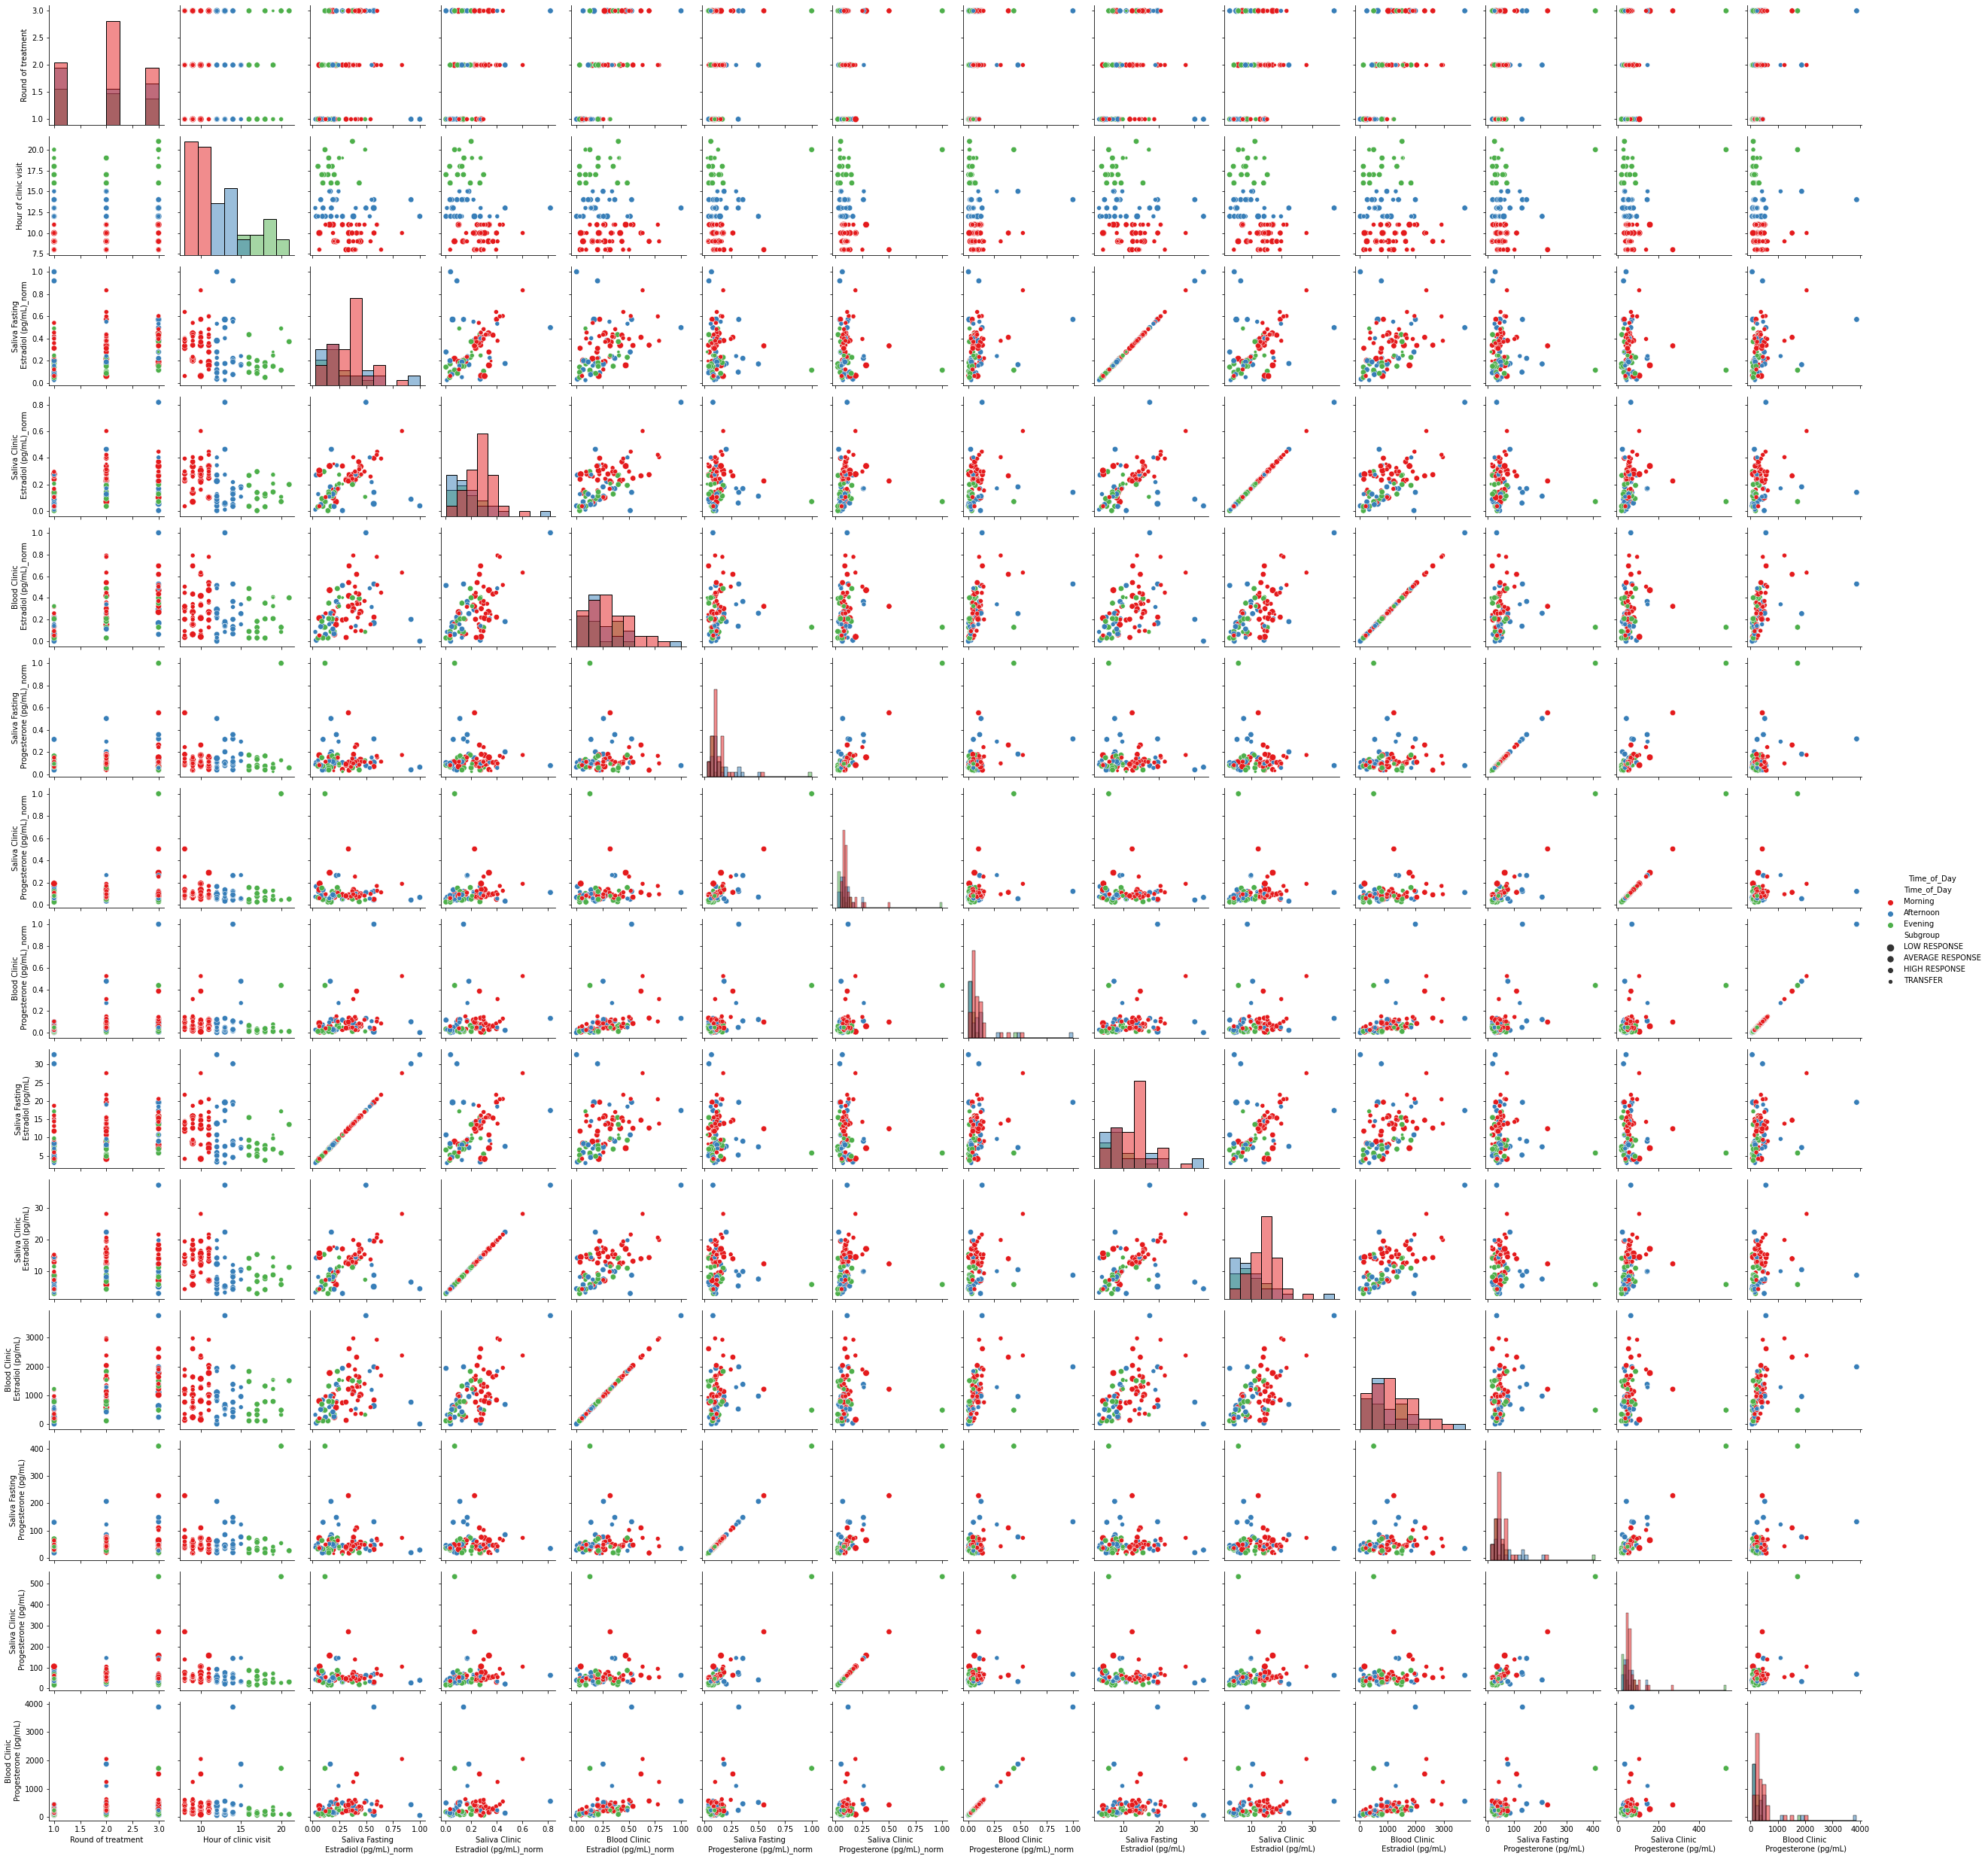

In [5]:
data=pd.read_csv(os.path.join(path,"aggregate_data_for_pearson_analysis.csv"))
print(data.columns)
data=data.rename(columns = {'BC_Estradiol (pg/mL)_norm':'Blood Clinic\n Estradiol (pg/mL)_norm', 'BC_Progesterone (pg/mL)_norm':'Blood Clinic\n Progesterone (pg/mL)_norm', 
'SC_Estradiol (pg/mL)_norm':'Saliva Clinic\n Estradiol (pg/mL)_norm', 'SC_Progesterone (pg/mL)_norm':'Saliva Clinic\n Progesterone (pg/mL)_norm', 
'SF_Estradiol (pg/mL)_norm':'Saliva Fasting\n Estradiol (pg/mL)_norm', 'SF_Progesterone (pg/mL)_norm':'Saliva Fasting\n Progesterone (pg/mL)_norm',
 'BC_Estradiol (pg/mL)':'Blood Clinic\n Estradiol (pg/mL)', 'BC_Progesterone (pg/mL)':'Blood Clinic\n Progesterone (pg/mL)', 
'SC_Estradiol (pg/mL)':'Saliva Clinic\n Estradiol (pg/mL)', 'SC_Progesterone (pg/mL)':'Saliva Clinic\n Progesterone (pg/mL)', 
'SF_Estradiol (pg/mL)':'Saliva Fasting\n Estradiol (pg/mL)', 'SF_Progesterone (pg/mL)':'Saliva Fasting\n Progesterone (pg/mL)',
 'Time_clinic': 'Hour of clinic visit', 'Round' : 'Round of treatment'})
data.Time_of_Day.replace(to_replace=['<1200', '>1200|<1600', '>1600'], value=['Morning', 'Afternoon', 'Evening'], inplace=True)
#axs=sns.pairplot(data=data, x_vars=["Round of treatment", "Hour of clinic visit", 'Subgroup_numeric'], y_vars=["Blood Clinic Estradiol (pg/mL)_norm", "Saliva Fasting Estradiol (pg/mL)_norm", "Saliva Clinic Estradiol (pg/mL)_norm"], hue='Time_of_Day', size=5, aspect=0.8, kind="reg", palette='Set1')
#for ax in axs.axes.flatten():
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #ax.set_xticks(np.arange(0, 3, 1))
    #ax.set_xticklabels([1.0,2.0,3.0])
        #ax.set_ylabel(['Blood Clinic Estradiol (pg/mL)', 'Saliva Fasting Estradiol (pg/mL)', 'Saliva Clinic Estradiol (pg/mL)'])
data.replace(to_replace=0, value=np.nan, inplace=True)
data.dropna(inplace=True)
data.drop(['ID', 'Unnamed: 0', 'Subgroup_numeric'], axis=1, inplace=True)
#print(data)
#print(stats.pearsonr(data['Blood Clinic Estradiol (pg/mL)_norm'], data['Hour of clinic visit']))

#y = data['Saliva Fasting Estradiol (pg/mL)_norm']

#define explanatory variable
#x = data['Hour of clinic visit']

#add constant to predictor variables
#x = sm.add_constant(x)

#fit linear regression model
#model = sm.OLS(y.astype(float), x.astype(float)).fit()


#view model summary
#print(model.summary())
print(data.columns)
g = plt.figure(figsize=[20,20])
g = sns.PairGrid(data, hue='Time_of_Day', hue_order=['Morning', 'Afternoon', 'Evening'], palette='Set1')
g.map_offdiag(sns.scatterplot, size=data['Subgroup'])
g.map_diag(sns.histplot)
g.add_legend()
#sns.set(fontscale=1.5)

In [ ]:
data=pd.read_csv(os.path.join(path,'Results_collated_normalised_300522.csv'))
data.loc[(data['SampleType']=='Blood Clinic'), 'Progesterone (pg/mL)'] = data.loc[(data['SampleType']=='Blood Clinic'), 'Progesterone (pg/mL)']*1000
print(data)
ax=sns.barplot(x="SampleType", y="Progesterone (pg/mL)", data=data, capsize=.2)
for i in ax.containers:
    ax.bar_label(i,)

print(data.loc[data['SampleType']=='Blood Clinic'].describe())

### Bland-Altman mean difference charts:

In [ ]:
data= pd.read_csv(os.path.join(path,'aggregate_data_for_pearson_analysis.csv'))
print(data.columns)

f, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(10,20))
sm.graphics.mean_diff_plot(data['SF_Estradiol (pg/mL)_norm'], data['BC_Estradiol (pg/mL)_norm'], ax = ax1)
ax1.set_title('Estradiol - Saliva Fasting & Blood Clinic: Mean Difference Plot')
#plt.savefig(os.path.join(path,'Estradiol_Saliva_Fasting_Blood_Clinic_Mean_Difference_Plot.png'))
#display Bla

sm.graphics.mean_diff_plot(data['SF_Progesterone (pg/mL)_norm'], data['BC_Progesterone (pg/mL)_norm'], ax = ax2)
ax2.set_title('Progesterone - Saliva Fasting & Blood Clinic: Mean Difference Plot')

sm.graphics.mean_diff_plot(data['SF_Estradiol (pg/mL)_norm'], data['SC_Estradiol (pg/mL)_norm'], ax = ax3)
ax3.set_title('Estradiol - Saliva Fasting & Saliva Clinic: Mean Difference Plot')


sm.graphics.mean_diff_plot(data['SF_Progesterone (pg/mL)_norm'], data['SC_Progesterone (pg/mL)_norm'], ax = ax4)
ax4.set_title('Progesterone - Saliva Fasting & Saliva Clinic: Mean Difference Plot')

plt
# 
# plt.close()



### distribution and reg plots joint:

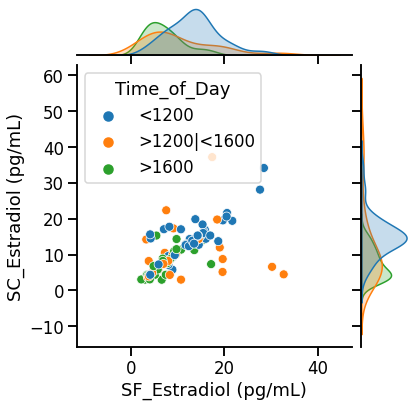

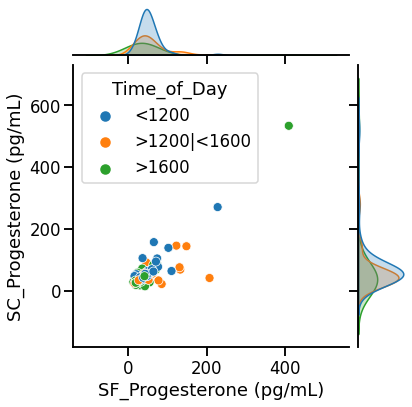

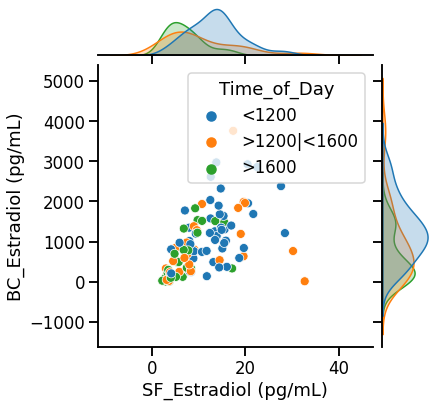

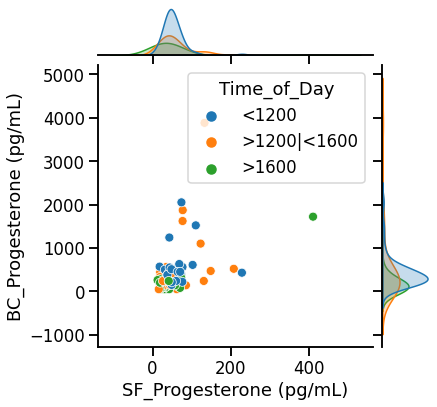

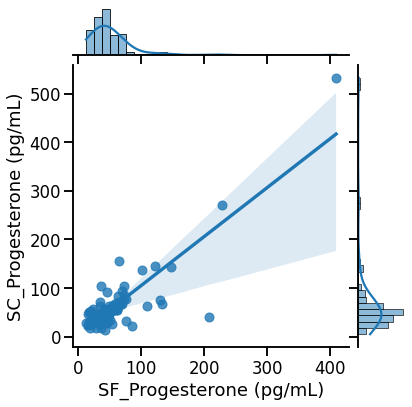

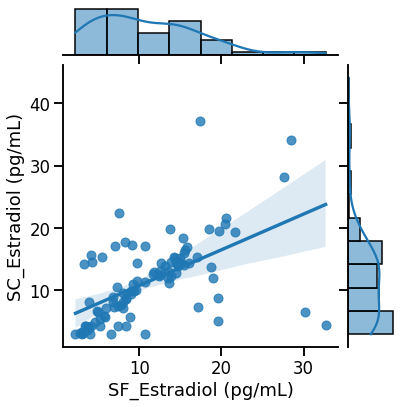

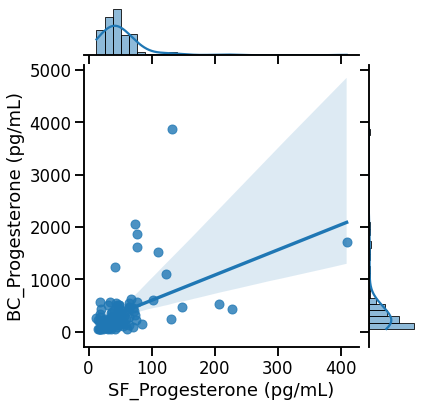

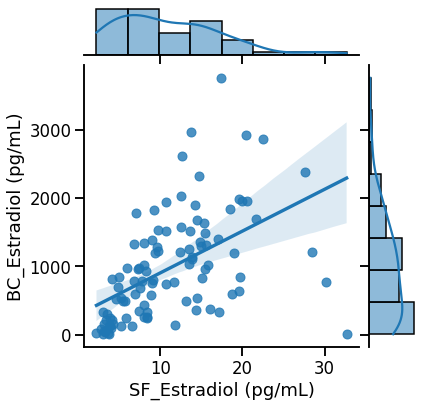

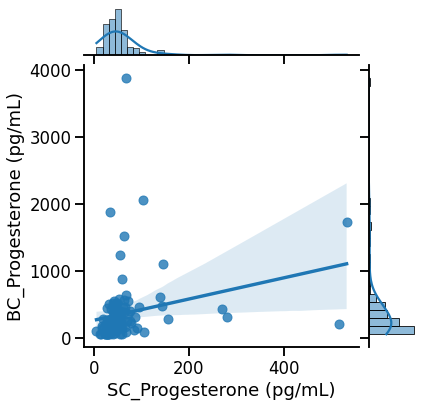

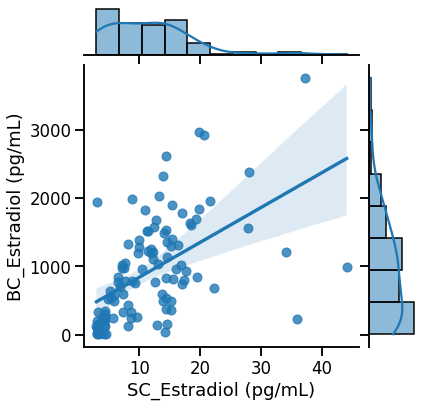

In [103]:
#sns.distplot(data['SF_Estradiol (pg/mL)'])
#plt.show()
data= pd.read_csv(os.path.join(path,'aggregate_data_for_pearson_analysis.csv'))
#plt.close()
#distribution plot and reg plot joint
#f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=8, sharex=True, figsize=(20,10))

#f, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(10,20))
ax1=sns.jointplot(x='SF_Estradiol (pg/mL)', y='SC_Estradiol (pg/mL)', data=data, hue='Time_of_Day', ax=ax1)
ax2=sns.jointplot(x='SF_Progesterone (pg/mL)', y='SC_Progesterone (pg/mL)', data=data, hue='Time_of_Day', ax=ax2)
ax3=sns.jointplot(x='SF_Estradiol (pg/mL)', y='BC_Estradiol (pg/mL)', data=data, hue='Time_of_Day', ax=ax3)
ax4=sns.jointplot(x='SF_Progesterone (pg/mL)', y='BC_Progesterone (pg/mL)', data=data, hue='Time_of_Day', ax=ax4)
ax5=sns.jointplot(x='SF_Progesterone (pg/mL)', y='SC_Progesterone (pg/mL)', data=data, kind='reg')
ax6=sns.jointplot(x='SF_Estradiol (pg/mL)', y='SC_Estradiol (pg/mL)', data=data, kind='reg')
ax7=sns.jointplot(x='SF_Progesterone (pg/mL)', y='BC_Progesterone (pg/mL)', data=data, kind='reg')
ax8=sns.jointplot(x='SF_Estradiol (pg/mL)', y='BC_Estradiol (pg/mL)', data=data, kind='reg')
ax9=sns.jointplot(x='SC_Progesterone (pg/mL)', y='BC_Progesterone (pg/mL)', data=data, kind='reg')
ax10=sns.jointplot(x='SC_Estradiol (pg/mL)', y='BC_Estradiol (pg/mL)', data=data, kind='reg')

#ax1.set_title('Estradiol - Saliva Fasting & Blood Clinic: Joint Plot')
#ax2 = sns.jointplot(x='SF_Progesterone (pg/mL)', y='SC_Progesterone (pg/mL)', data=data, kind='reg', ax=ax2)
#ax2.set_title('Progesterone - Saliva Fasting & Blood Clinic: Joint Plot')




# correlation matrices::

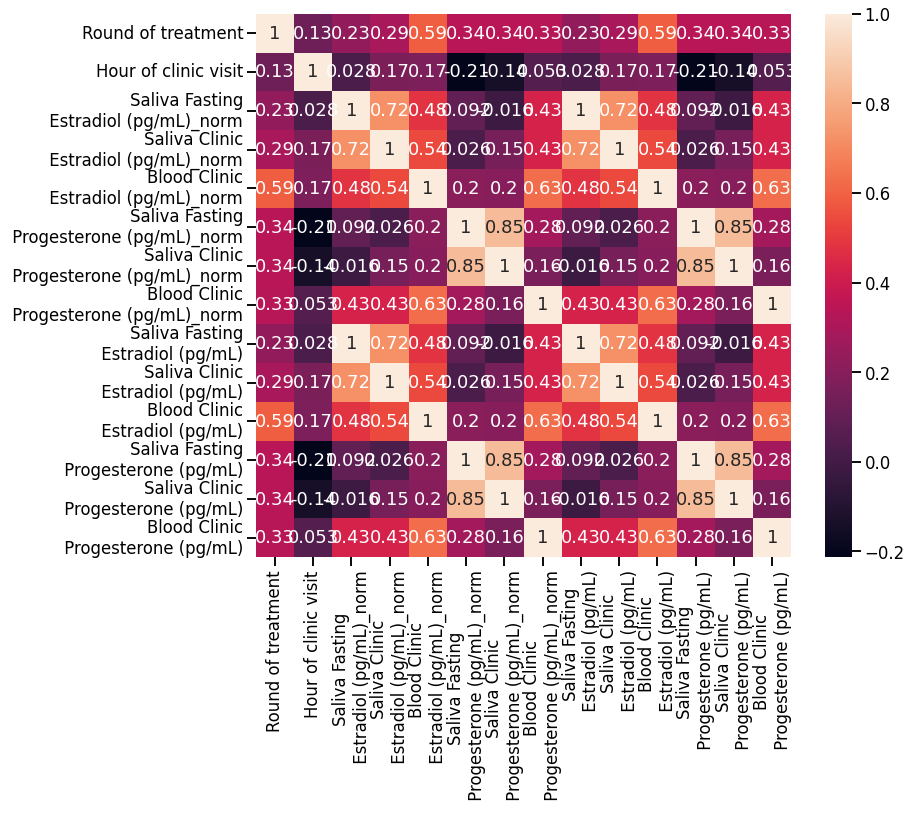

KeyError: 'Time_clinic'

In [10]:
datamorning= data.loc[data['Time_of_Day']=='Morning']
dataaft= data.loc[data['Time_of_Day']=='Afternoon']
matrix = datamorning.corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1      # Min number of observations required
)
ax = plt.figure(figsize=(12,10))
#print(matrix)
ax=sns.heatmap(matrix, annot=True)
#fig.figure(figsize=(20,20))
plt.show()
#matrix.to_csv('C:/Users/KatherineRidley/Mint Diagnostics Ltd/Mint Drive - Documents/Data/IVI_serumvsaliva_KR/correlation_matrix_010622.csv')

y = data['Saliva Fasting\n Estradiol (pg/mL)_norm']

#define explanatory variable
x = data['Time_clinic']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y.astype(float), x.astype(float)).fit()

#view model summary
#print(model.summary())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
#print(BS1CElog)

#data=ogdf.loc[ogdf['Patient ID']==2]
S1FE=data.loc[data['Sample'].str.contains('F'), 'Estradiol (pg/mL)'].astype(float)

S1CE=data.loc[(data['Sample'].str.contains('C')) & (data['Type']=='Saliva'), 'Estradiol (pg/mL)'].astype(float)

BS1CE=data.loc[(data['Sample'].str.contains('C')) & (data['Type']=='Blood'), 'Estradiol (pg/mL)'].astype(float)
bland_altman_plot(S1FE, BS1CE)